## 테이블의 내용은 아래의 내용을 담고 있습니다.
1. 고객이 각 귀속년도별
1. 근로 / 사업 / 기타 소득에 대한 예상환급액과 수수료를 조회한 뒤
1. 결제를 하거나 하지 않은 여부를 저장

## 컬럼 정보는 다음과 같습니다.
- age: 고객의 만 나이입니다. 
- gender: 고객의 성별입니다.
- year: 소득이 발생한 연도(귀속년도)입니다.
- refund: 예상환급액입니다.
- fee: 수수료입니다.
- has_paid: 수수료를 결제했는지의 여부
- income_근로: 고객의 근로소득(월급/일용직급여)
- income_사업: 고객의 사업소득(프리랜서 소득)
- income_기타: 고객의 기타소득(그외 기타 소득)

## 아래의 질문에 나름의 방식으로 답을 찾아주세요.
(정답은 없습니다. 문제를 정의하고, 해답에 이르게 된 과정과 그 해석을 잘 설득/설명해 주시는 것이 중요합니다.)

- 고객의 결제여부에 영향을 미치는 요인들은 무엇인가요? 
- 고객의 수수료 결제금액의 합을 높히기 위해서는 어떻게 해야 할까요?


In [1]:
# !apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

In [2]:
### 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
import plaidml.keras
import os
plaidml.keras.install_backend ()
os.environ ['KERAS_BACKEND'] ='plaidml.keras.backend'

# df = pd.concat(pd.read_csv(archive.open(filename)) for filename in archive.namelist())

In [3]:
### plaidml 테스트
import keras
import keras.applications as kapp
from keras.datasets import cifar10
import time
(x_train, y_train_cats), (x_test, y_test_cats) = cifar10.load_data()
batch_size = 8
x_train = x_train[:batch_size]
x_train = np.repeat(np.repeat(x_train, 7, axis=1), 7, axis=2)
model = kapp.VGG19()
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

print("Running initial batch (compiling tile program)")
y = model.predict(x=x_train, batch_size=batch_size)

# Now start the clock and run 10 batches
print("Timing inference...")
start = time.time()
for i in range(10):
    y = model.predict(x=x_train, batch_size=batch_size)
print("Ran in {} seconds".format(time.time() - start))

INFO:plaidml:Opening device "opencl_amd_ellesmere.0"


Running initial batch (compiling tile program)
Timing inference...
Ran in 2.0532257556915283 seconds


In [4]:
df = pd.read_csv('C:/Users/Bonghwan/Downloads/jobis/Jobis_3o3.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   age        100000 non-null  float64
 1   gender     100000 non-null  object 
 2   year       100000 non-null  int64  
 3   refund     100000 non-null  float64
 4   fee        100000 non-null  float64
 5   has_paid   100000 non-null  bool   
 6   income_근로  40791 non-null   float64
 7   income_사업  78227 non-null   float64
 8   income_기타  25260 non-null   float64
dtypes: bool(1), float64(6), int64(1), object(1)
memory usage: 6.2+ MB


In [6]:
df.describe()

,age,year,refund,fee,income_근로,income_사업,income_기타
count,100000.00000,100000.000000,1.000000e+05,100000.000000,4.079100e+04,7.822700e+04,2.526000e+04
mean,29.00096,2018.111300,2.081422e+05,7247.641000,6.432597e+06,1.511712e+06,6.362834e+05
std,7.76819,1.495812,3.071744e+05,11926.896979,6.583716e+06,2.449810e+06,1.484947e+06
min,15.00000,2015.000000,-8.265000e+06,400.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,24.00000,2017.000000,3.300000e+04,400.000000,1.616000e+06,1.770000e+05,8.200000e+04
50%,27.00000,2018.000000,9.900000e+04,4300.000000,4.507000e+06,6.190000e+05,2.130000e+05
75%,31.00000,2019.000000,2.540000e+05,8500.000000,9.301000e+06,1.601000e+06,5.820000e+05
max,81.00000,2020.000000,7.725000e+06,307000.000000,1.823350e+08,3.993400e+07,6.281000e+07


In [7]:
df.head(10)

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,NaN
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,NaN,1815000.0
2,28.0,F,2017,289000.0,11500.0,False,NaN,1461000.0,NaN
3,27.0,M,2019,410000.0,16200.0,False,NaN,2471000.0,NaN
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,NaN
5,39.0,F,2015,546000.0,12800.0,True,NaN,3628000.0,213000.0
6,40.0,F,2019,4000.0,400.0,True,11512000.0,24000.0,NaN
7,23.0,M,2017,10000.0,400.0,True,186000.0,74000.0,NaN
8,54.0,M,2016,1847000.0,73100.0,False,18728000.0,NaN,2841000.0
9,22.0,M,2018,51000.0,900.0,False,NaN,NaN,153000.0


In [8]:
df.fillna(0, inplace=True)
df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,0.0
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,0.0,1815000.0
2,28.0,F,2017,289000.0,11500.0,False,0.0,1461000.0,0.0
3,27.0,M,2019,410000.0,16200.0,False,0.0,2471000.0,0.0
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,0.0
...,...,...,...,...,...,...,...,...,...
99995,27.0,F,2019,301000.0,11900.0,True,0.0,0.0,680000.0
99996,62.0,F,2019,77000.0,1300.0,True,0.0,463000.0,0.0
99997,24.0,M,2020,9000.0,400.0,False,7923000.0,54000.0,0.0
99998,24.0,M,2019,34000.0,400.0,True,0.0,204000.0,0.0


In [9]:
## 환급금 마이너스 제거
### 환급금이 마이너스 일 경우 수수료를 받지 않는 삼쩜삼 서비스 특성 고려
min_list = df[df['refund']<0].index.tolist()
df = df[~df.index.isin(min_list)]
df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,0.0
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,0.0,1815000.0
2,28.0,F,2017,289000.0,11500.0,False,0.0,1461000.0,0.0
3,27.0,M,2019,410000.0,16200.0,False,0.0,2471000.0,0.0
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,0.0
...,...,...,...,...,...,...,...,...,...
99995,27.0,F,2019,301000.0,11900.0,True,0.0,0.0,680000.0
99996,62.0,F,2019,77000.0,1300.0,True,0.0,463000.0,0.0
99997,24.0,M,2020,9000.0,400.0,False,7923000.0,54000.0,0.0
99998,24.0,M,2019,34000.0,400.0,True,0.0,204000.0,0.0


In [10]:
df = df[df['refund'] != -0]
df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,0.0
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,0.0,1815000.0
2,28.0,F,2017,289000.0,11500.0,False,0.0,1461000.0,0.0
3,27.0,M,2019,410000.0,16200.0,False,0.0,2471000.0,0.0
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,0.0
...,...,...,...,...,...,...,...,...,...
99995,27.0,F,2019,301000.0,11900.0,True,0.0,0.0,680000.0
99996,62.0,F,2019,77000.0,1300.0,True,0.0,463000.0,0.0
99997,24.0,M,2020,9000.0,400.0,False,7923000.0,54000.0,0.0
99998,24.0,M,2019,34000.0,400.0,True,0.0,204000.0,0.0


In [11]:
### has_paid binary
df['has_paid'] = df['has_paid'].apply(lambda x : 1 if x else 0)
df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
0,27.0,F,2019,5000.0,400.0,0,10001000.0,61000.0,0.0
1,34.0,M,2018,100000.0,1700.0,1,18092000.0,0.0,1815000.0
2,28.0,F,2017,289000.0,11500.0,0,0.0,1461000.0,0.0
3,27.0,M,2019,410000.0,16200.0,0,0.0,2471000.0,0.0
4,26.0,F,2016,114000.0,4300.0,1,0.0,689000.0,0.0
...,...,...,...,...,...,...,...,...,...
99995,27.0,F,2019,301000.0,11900.0,1,0.0,0.0,680000.0
99996,62.0,F,2019,77000.0,1300.0,1,0.0,463000.0,0.0
99997,24.0,M,2020,9000.0,400.0,0,7923000.0,54000.0,0.0
99998,24.0,M,2019,34000.0,400.0,1,0.0,204000.0,0.0


In [12]:
# gender 컬럼 데이터 값 변환
# 남자는 0, 여자는 1

def make_gen_bin(sent):
  if sent == 'M':
    sent = 0
  if sent == 'F':
    sent = 1
    ### 성별 정보가 없는 경우 drop 하지 않고, 2로 처리// 성별은 결제율에 큰 영향을 끼치지 않음
  if sent == '-':
    sent = 2
  return sent
df['gender'] = df['gender'].apply(lambda x: make_gen_bin(x))

In [13]:
## 년도별 이용자 및 결제자 확인
df15 = df[df['year']==2015]
df16 = df[df['year']==2016]
df17 = df[df['year']==2017]
df18 = df[df['year']==2018]
df19 = df[df['year']==2019]
df20 = df[df['year']==2020]


In [14]:

print('2015년 이용자 {}, 결제자 {}'.format(len(df15),len(df15.query('has_paid == True'))))
print('2016년 이용자 {}, 결제자 {}'.format(len(df16),len(df16.query('has_paid == True'))))
print('2017년 이용자 {}, 결제자 {}'.format(len(df17),len(df17.query('has_paid == True'))))
print('2018년 이용자 {}, 결제자 {}'.format(len(df18),len(df18.query('has_paid == True'))))
print('2019년 이용자 {}, 결제자 {}'.format(len(df19),len(df19.query('has_paid == True'))))
print('2020년 이용자 {}, 결제자 {}'.format(len(df20),len(df20.query('has_paid == True'))))

2015년 이용자 3939, 결제자 2816
2016년 이용자 13907, 결제자 9693
2017년 이용자 17489, 결제자 12200
2018년 이용자 19977, 결제자 13883
2019년 이용자 20834, 결제자 14475
2020년 이용자 23778, 결제자 11540


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


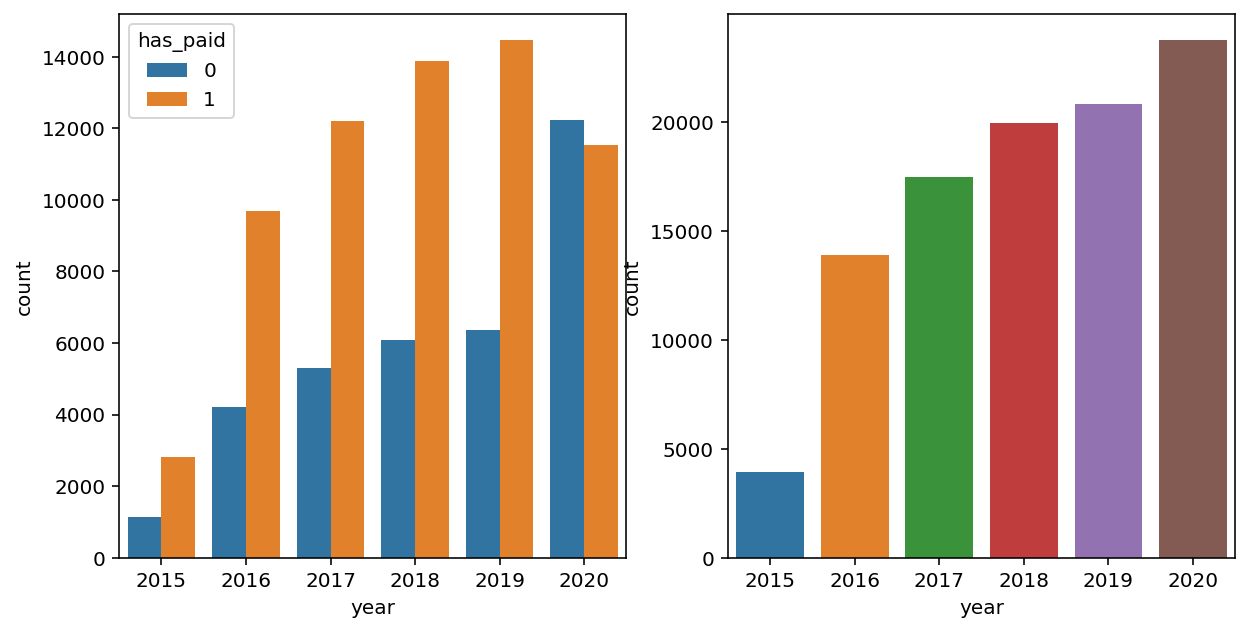

In [15]:
## 년도별 결제 및 이용자 수 그래프

figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(10,5)
sns.countplot(data=df, x="year", hue='has_paid', ax=ax1)
sns.countplot(data=df, x="year", ax=ax2)
plt.show()

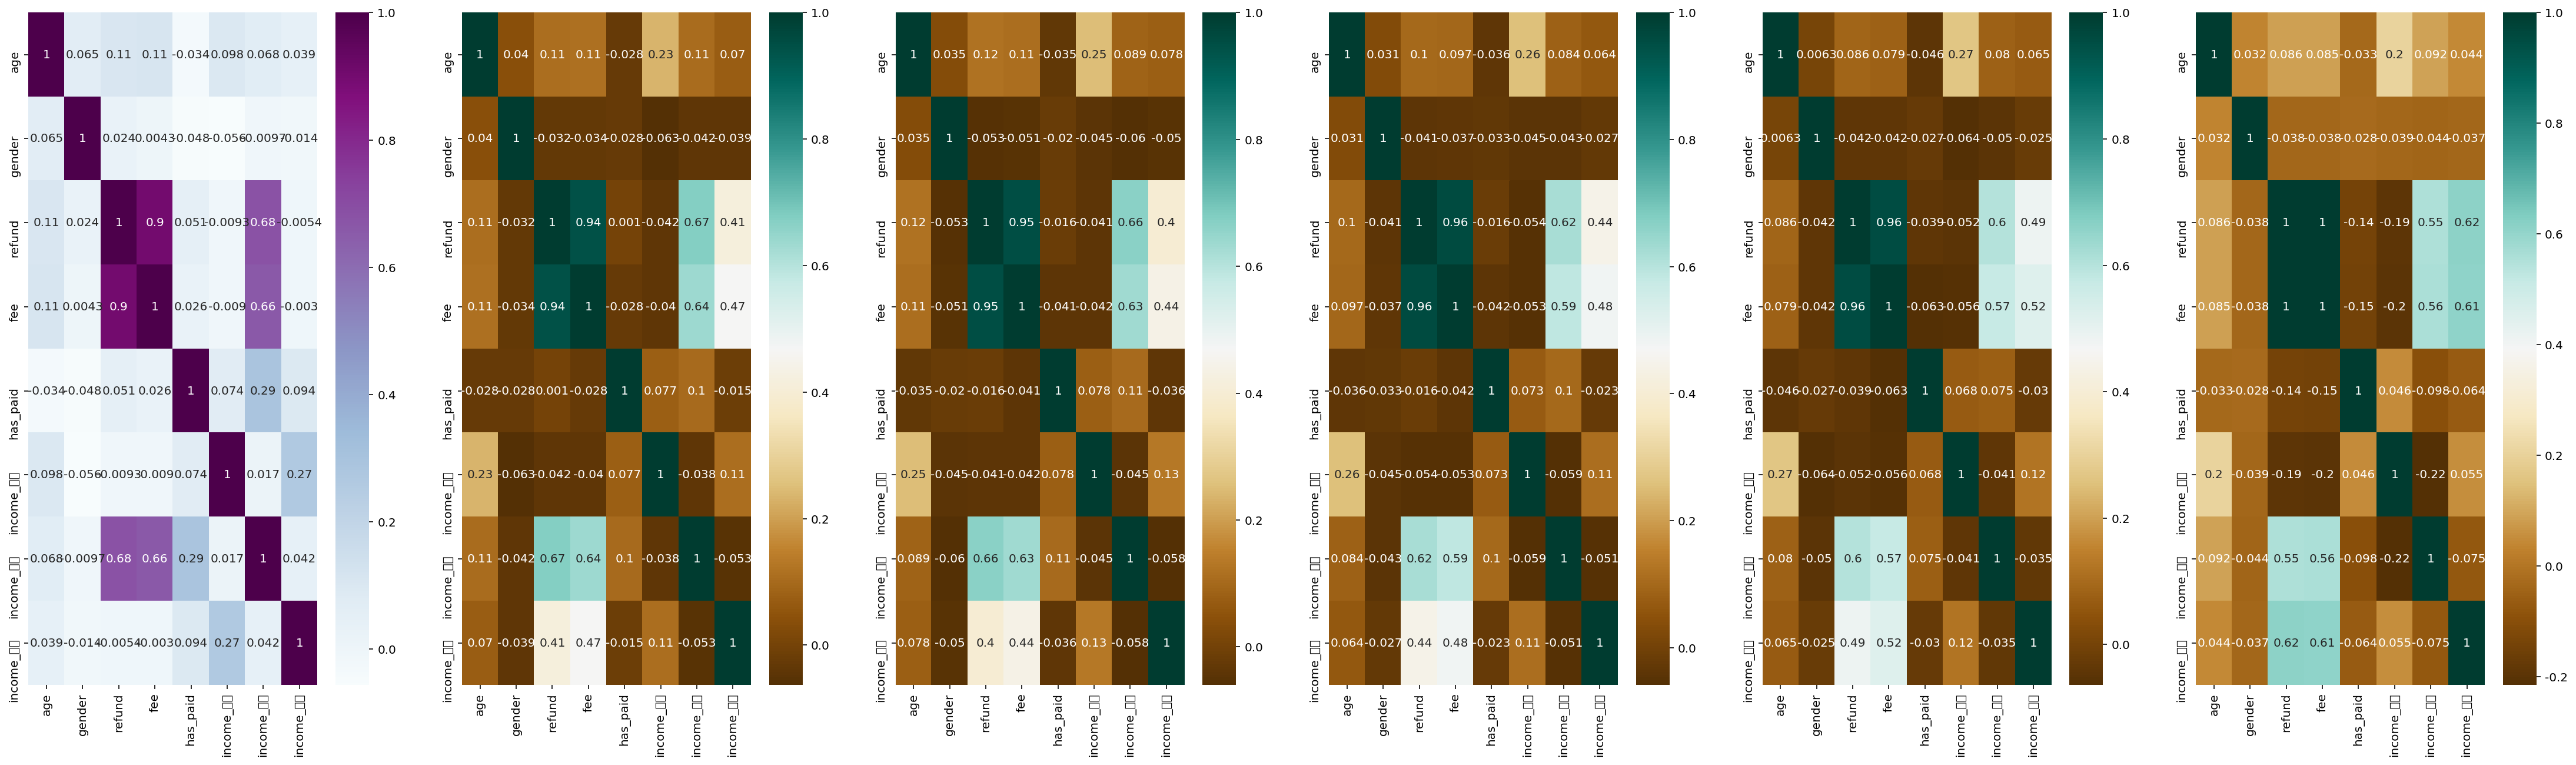

In [16]:
import matplotlib as mpl
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

mpl.rcParams['axes.unicode_minus'] = False

fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(nrows=1, ncols=6)
fig.set_size_inches(38.5, 10.5)


heatdf15 = df15[[ 'age',	'gender',	'refund',	'fee'	,'has_paid'	,'income_근로',	'income_사업',	'income_기타']]
sns.heatmap(heatdf15.corr(), cmap='BuPu', annot = True, cbar=True, ax=ax1)

heatdf16 = df16[['age',	'gender',	'refund',	'fee'	,'has_paid'	,'income_근로',	'income_사업',	'income_기타']]
sns.heatmap(heatdf16.corr(), cmap='BrBG', annot = True, cbar=True, ax=ax2)


heatdf17 = df17[['age',	'gender',	'refund',	'fee'	,'has_paid'	,'income_근로',	'income_사업',	'income_기타']]
sns.heatmap(heatdf17.corr(), cmap='BrBG', annot = True, cbar=True, ax=ax3)


heatdf18 = df18[['age',	'gender',	'refund',	'fee'	,'has_paid'	,'income_근로',	'income_사업',	'income_기타']]
sns.heatmap(heatdf18.corr(), cmap='BrBG', annot = True, cbar=True, ax=ax4)


heatdf19 = df19[['age',	'gender',	'refund',	'fee'	,'has_paid'	,'income_근로',	'income_사업',	'income_기타']]
sns.heatmap(heatdf19.corr(), cmap='BrBG', annot = True, cbar=True, ax=ax5)


heatdf20 = df20[['age',	'gender',	'refund',	'fee'	,'has_paid'	,'income_근로',	'income_사업',	'income_기타']]
sns.heatmap(heatdf20.corr(), cmap='BrBG', annot = True, cbar=True, ax=ax6)


plt.show()

In [17]:
df.columns

Index(['age', 'gender', 'year', 'refund', 'fee', 'has_paid', 'income_근로',
       'income_사업', 'income_기타'],
      dtype='object')

In [18]:
# 환급금 대비 수수료 비율
df['환급금_수수료율'] = round(df['fee']/df['refund'], 4) *100
df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율
0,27.0,1,2019,5000.0,400.0,0,10001000.0,61000.0,0.0,8.00
1,34.0,0,2018,100000.0,1700.0,1,18092000.0,0.0,1815000.0,1.70
2,28.0,1,2017,289000.0,11500.0,0,0.0,1461000.0,0.0,3.98
3,27.0,0,2019,410000.0,16200.0,0,0.0,2471000.0,0.0,3.95
4,26.0,1,2016,114000.0,4300.0,1,0.0,689000.0,0.0,3.77
...,...,...,...,...,...,...,...,...,...,...
99995,27.0,1,2019,301000.0,11900.0,1,0.0,0.0,680000.0,3.95
99996,62.0,1,2019,77000.0,1300.0,1,0.0,463000.0,0.0,1.69
99997,24.0,0,2020,9000.0,400.0,0,7923000.0,54000.0,0.0,4.44
99998,24.0,0,2019,34000.0,400.0,1,0.0,204000.0,0.0,1.18


In [19]:
# 근로 수입이 가장 큰 경우
emp_list = df.query('income_근로 > income_사업 and income_근로 > income_기타').index.values.tolist()
# 사업 소득이 가장 큰 경우
bus_list = df.query('income_근로 < income_사업 and income_사업 > income_기타').index.values.tolist()
# 기타 수입이 제일 큰 경우
etc_list = df.query('income_기타 > income_사업 and income_근로 < income_기타').index.values.tolist()
emp_df = df[df.index.isin(emp_list)]
bus_df = df[df.index.isin(bus_list)]
etc_df = df[df.index.isin(etc_list)]

In [20]:
print(len(emp_list), '\t', len(bus_list), '\t', len(etc_list), '\t합은 {} '.format(len(emp_list)+ len(bus_list) +len(etc_list)) )

33299 	 49383 	 8008 	합은 90690 


In [21]:
## 모든 수입이 0인 값이 있는 지 확인.
df.query('income_근로 ==0 and income_사업 ==0 and income_기타==0').index.unique().tolist() == df.query('income_근로 == income_사업 == income_기타').index.tolist() # True
# 모든 소득이 0 인 경우와 모든 소득이 동일한 경우가 일치.

no_money = df.query('income_근로 == income_사업 == income_기타').index.tolist()
# no_money = no_df.query('income_근로 == income_사업 == income_기타').index.tolist()
print(len(no_money))

9180


In [22]:
## 모든 소득이 동일 and 소득이 0
no_list = list(set(emp_list) | set(bus_list) | set(etc_list))
no_df = df[~df.index.isin(no_list)]

print(df.query('income_근로 == income_사업 == income_기타 and income_근로 != 0').index.tolist())
## 소득이 0이 아니면서 동일한 값은 없음.

[]


In [23]:
## 근로소득과 사업소득이 동일
no_etc = no_df.query('income_근로 == income_사업 != income_기타').index.tolist()
# 근로 소득과 기타 소득이 동일
no_bus = no_df.query('income_근로 == income_기타 != income_사업').index.tolist()
# 사업소득과 기타 소득이 동일
no_work = no_df.query('income_근로 != income_기타 == income_사업').index.tolist()
print(len(no_etc), len(no_bus), len(no_work), '합 : ', (len(no_etc) + len(no_bus) + len(no_work)))

16 1 37 합 :  54


In [24]:
(len(emp_list)+ len(bus_list) +len(etc_list)) + len(no_df)

99924

In [25]:
no_df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율
20,40.0,1,2018,46000.0,400.0,0,0.0,0.0,0.0,0.87
24,33.0,0,2018,21000.0,400.0,0,0.0,0.0,0.0,1.90
33,22.0,0,2018,69000.0,400.0,1,0.0,0.0,0.0,0.58
41,32.0,0,2019,251000.0,7200.0,0,0.0,0.0,0.0,2.87
43,35.0,0,2015,568000.0,12800.0,0,0.0,0.0,0.0,2.25
...,...,...,...,...,...,...,...,...,...,...
99979,34.0,0,2016,189000.0,4300.0,0,0.0,0.0,0.0,2.28
99984,25.0,1,2018,286000.0,8500.0,0,0.0,0.0,0.0,2.97
99988,45.0,0,2018,152000.0,4300.0,0,0.0,0.0,0.0,2.83
99992,25.0,1,2018,137000.0,3800.0,0,0.0,0.0,0.0,2.77


새로운 컬럼 income_cat 생성

주요 소득 군 설정  
근로:0  
사업:1  
기타:2  
근로==사업:3  
사업==기타:4  
근로==기타:5  
소득 없음:6 

In [26]:
empty = []
count = 0

from tqdm import tqdm
df['income_cat']  = 6
for i in tqdm(df.index, position=0, leave=True):
  if i in emp_list:
    df['income_cat'][i] = 0
    # print(i)
  if i in bus_list:
    df['income_cat'][i] = 1
    # print(i)
  if i in etc_list:
    df['income_cat'][i] = 2
  if i in no_work:
    df['income_cat'][i] = 3
  if i in no_bus:
    df['income_cat'][i] = 4
  if i in no_etc:
    df['income_cat'][i] = 5
  if i in no_money:
    df['income_cat'][i] = 6

100%|██████████████████████████████████████████████████████████████████████████| 99924/99924 [01:12<00:00, 1378.11it/s]


In [27]:
df[df['income_cat']==6]

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율,income_cat
20,40.0,1,2018,46000.0,400.0,0,0.0,0.0,0.0,0.87,6
24,33.0,0,2018,21000.0,400.0,0,0.0,0.0,0.0,1.90,6
33,22.0,0,2018,69000.0,400.0,1,0.0,0.0,0.0,0.58,6
41,32.0,0,2019,251000.0,7200.0,0,0.0,0.0,0.0,2.87,6
43,35.0,0,2015,568000.0,12800.0,0,0.0,0.0,0.0,2.25,6
...,...,...,...,...,...,...,...,...,...,...,...
99979,34.0,0,2016,189000.0,4300.0,0,0.0,0.0,0.0,2.28,6
99984,25.0,1,2018,286000.0,8500.0,0,0.0,0.0,0.0,2.97,6
99988,45.0,0,2018,152000.0,4300.0,0,0.0,0.0,0.0,2.83,6
99992,25.0,1,2018,137000.0,3800.0,0,0.0,0.0,0.0,2.77,6


In [28]:
### 성별이 없는 데이터 확인
print(len(df[df['gender'] != 'F']) + len(df[df['gender'] != 'M']))
print(len(df[df['gender'] != 'M']))
female_list = df[df['gender'] =='F'].index.tolist()
male_list = df[df['gender'] =='M'].index.tolist()

not_female = df[~df.index.isin(female_list)]
not_gender = not_female[~not_female.index.isin(male_list)]
not_gender
# not_male = df[~df.index.isin(male_list)]

199848
99924


,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율,income_cat
0,27.0,1,2019,5000.0,400.0,0,10001000.0,61000.0,0.0,8.00,0
1,34.0,0,2018,100000.0,1700.0,1,18092000.0,0.0,1815000.0,1.70,0
2,28.0,1,2017,289000.0,11500.0,0,0.0,1461000.0,0.0,3.98,1
3,27.0,0,2019,410000.0,16200.0,0,0.0,2471000.0,0.0,3.95,1
4,26.0,1,2016,114000.0,4300.0,1,0.0,689000.0,0.0,3.77,1
...,...,...,...,...,...,...,...,...,...,...,...
99995,27.0,1,2019,301000.0,11900.0,1,0.0,0.0,680000.0,3.95,2
99996,62.0,1,2019,77000.0,1300.0,1,0.0,463000.0,0.0,1.69,1
99997,24.0,0,2020,9000.0,400.0,0,7923000.0,54000.0,0.0,4.44,0
99998,24.0,0,2019,34000.0,400.0,1,0.0,204000.0,0.0,1.18,1


In [29]:
len(df[df['gender'] == 0]) + len(df[df['gender'] == 1])

99902

In [30]:
len(df[df['gender'] ==0]) + len(df[df['gender'] ==1])

99902

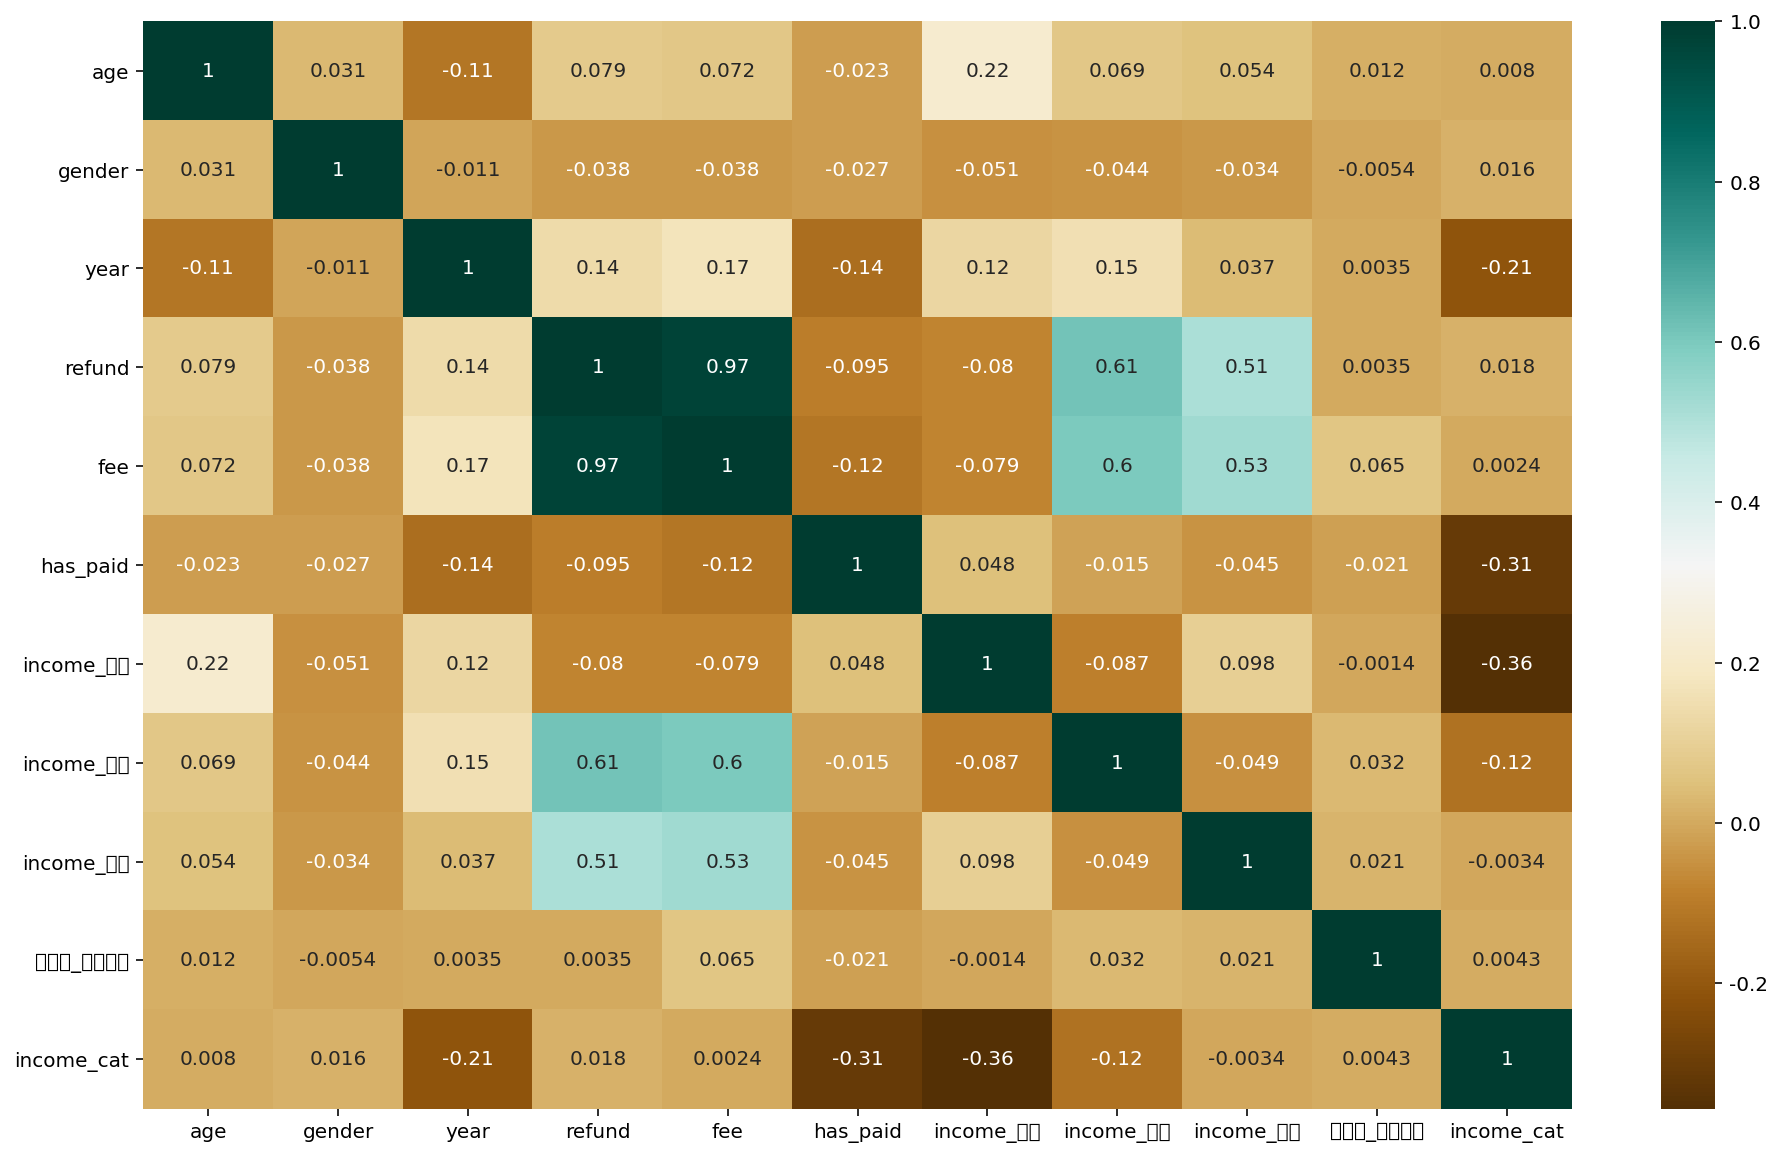

In [31]:
import matplotlib as mpl
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

mpl.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize=(16, 10))
heat_df = df[['age',	'gender',	'year',	'refund',	'fee'	,'has_paid'	,'income_근로',	'income_사업',	'income_기타',	'환급금_수수료율',	'income_cat']]
sns.heatmap(heat_df.corr(), cmap='BrBG', annot = True, cbar=True, )

plt.show()

In [32]:
def make_age_group(sent):
  if sent < 20 and sent >=10:
    age_group =   0
  if sent < 30 and sent >=20:
    age_group =   1
  if sent < 40 and sent >=30:
    age_group =   2
  if sent < 50 and sent >=40:
    age_group =   3
  if sent < 60 and sent >=50:
    age_group =   4
  ## 60 대 이상으로 묶기
  if sent >=60:
    age_group =   5
  
  return age_group

# 10대 0
# 20대 1
# 30대 2
# 40대 3
# 50대 4
# 60대 이상 5


In [33]:
df['age_group'] = df['age'].apply(lambda x : make_age_group(x))

In [34]:
df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율,income_cat,age_group
0,27.0,1,2019,5000.0,400.0,0,10001000.0,61000.0,0.0,8.00,0,1
1,34.0,0,2018,100000.0,1700.0,1,18092000.0,0.0,1815000.0,1.70,0,2
2,28.0,1,2017,289000.0,11500.0,0,0.0,1461000.0,0.0,3.98,1,1
3,27.0,0,2019,410000.0,16200.0,0,0.0,2471000.0,0.0,3.95,1,1
4,26.0,1,2016,114000.0,4300.0,1,0.0,689000.0,0.0,3.77,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,27.0,1,2019,301000.0,11900.0,1,0.0,0.0,680000.0,3.95,2,1
99996,62.0,1,2019,77000.0,1300.0,1,0.0,463000.0,0.0,1.69,1,5
99997,24.0,0,2020,9000.0,400.0,0,7923000.0,54000.0,0.0,4.44,0,1
99998,24.0,0,2019,34000.0,400.0,1,0.0,204000.0,0.0,1.18,1,1


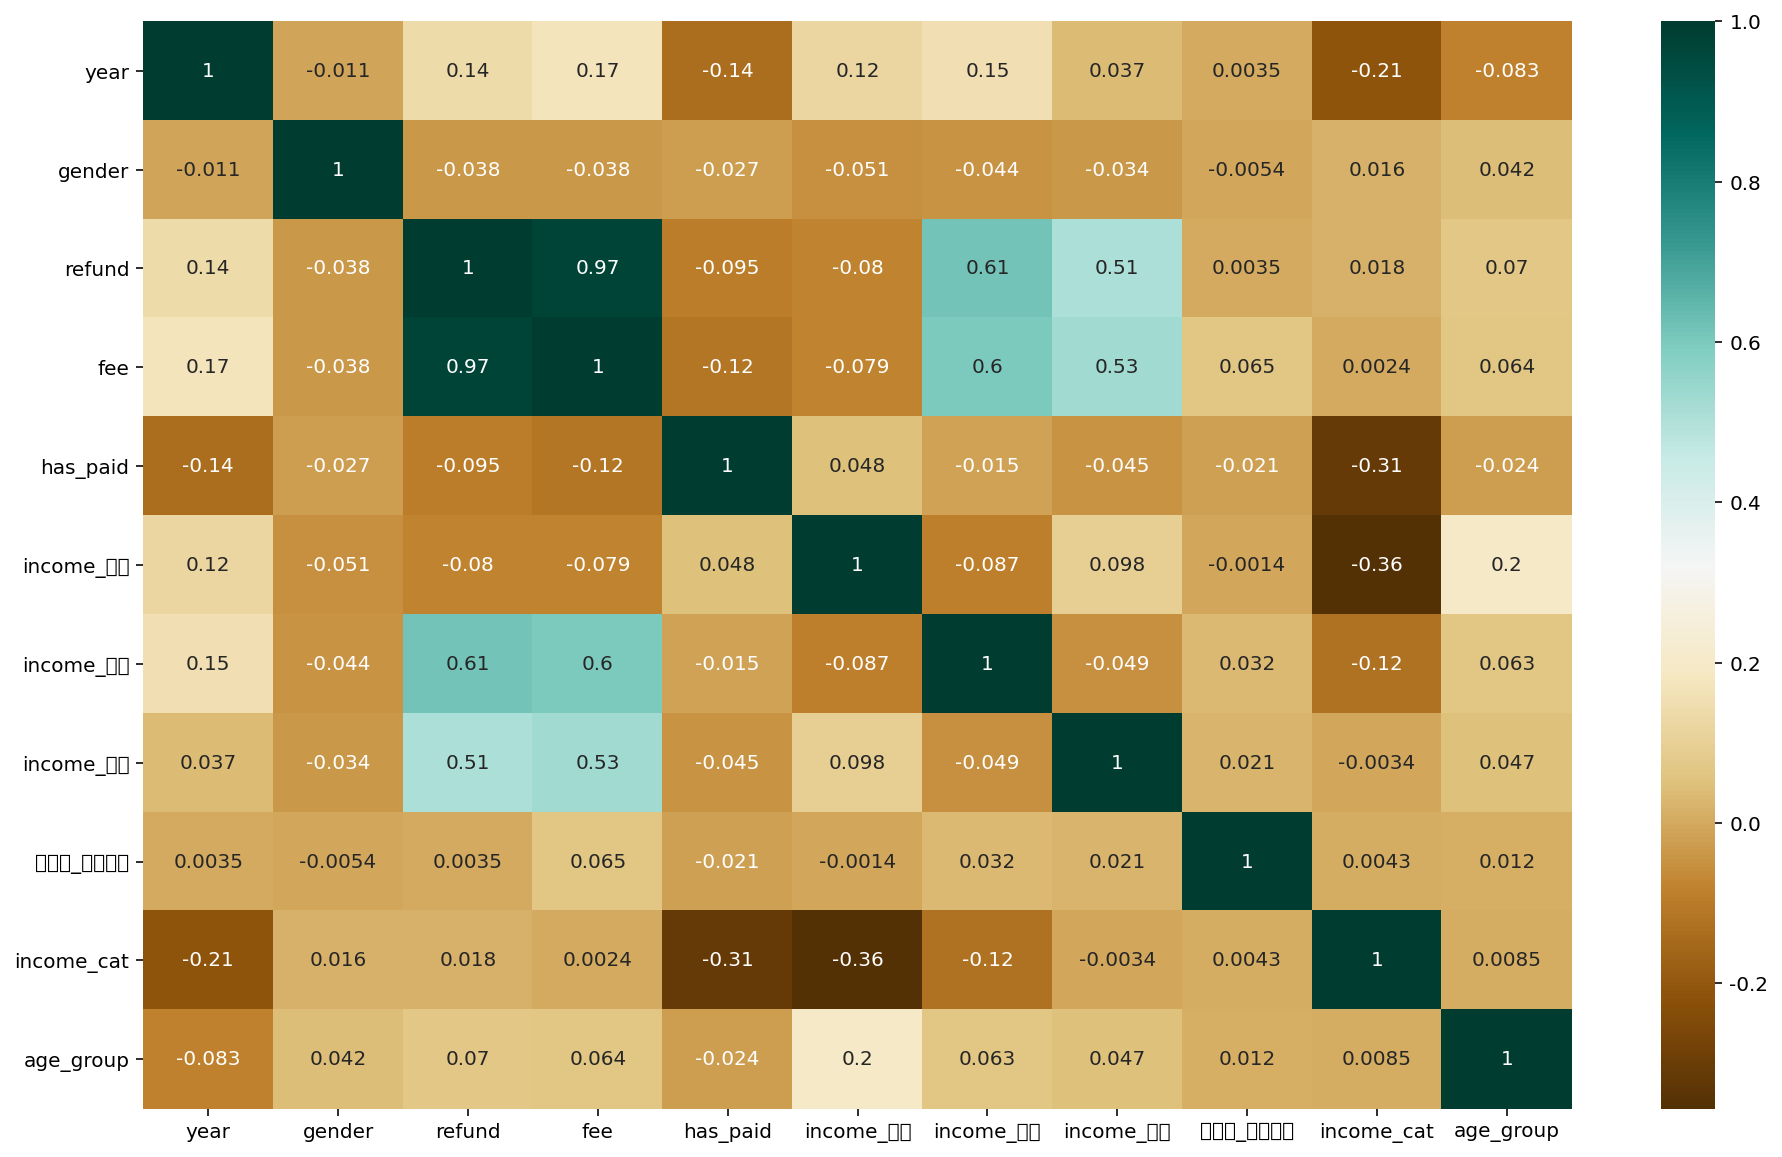

In [35]:
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

mpl.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize=(16, 10))

heat_df = df[['year', 'gender',	'refund',	'fee'	,'has_paid'	,'income_근로',	'income_사업',	'income_기타',	'환급금_수수료율',	'income_cat', 'age_group']]
# mask = np.zeros_like(heat_df.corr())
# mask[np.triu_indices_from(mask)] = True
sns.heatmap(heat_df.corr(), cmap='BrBG', annot = True, cbar=True )

plt.show()

In [36]:
heat_df.corr().query('has_paid > 0.3 or has_paid < -0.3')

,year,gender,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율,income_cat,age_group
has_paid,-0.136779,-0.026526,-0.094759,-0.117773,1.000000,0.048144,-0.015023,-0.044864,-0.021334,-0.310547,-0.024053
income_cat,-0.212486,0.016122,0.017817,0.002365,-0.310547,-0.356301,-0.123713,-0.003383,0.004297,1.000000,0.008517


In [37]:
heat_df.corr()

,year,gender,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율,income_cat,age_group
year,1.000000,-0.011187,0.141144,0.169538,-0.136779,0.124308,0.153326,0.036515,0.003477,-0.212486,-0.083232
gender,-0.011187,1.000000,-0.037817,-0.037859,-0.026526,-0.051297,-0.044297,-0.033822,-0.005397,0.016122,0.042351
refund,0.141144,-0.037817,1.000000,0.973925,-0.094759,-0.079900,0.613391,0.509962,0.003479,0.017817,0.069735
fee,0.169538,-0.037859,0.973925,1.000000,-0.117773,-0.079484,0.601119,0.531484,0.064889,0.002365,0.063904
has_paid,-0.136779,-0.026526,-0.094759,-0.117773,1.000000,0.048144,-0.015023,-0.044864,-0.021334,-0.310547,-0.024053
income_근로,0.124308,-0.051297,-0.079900,-0.079484,0.048144,1.000000,-0.086927,0.098044,-0.001418,-0.356301,0.199188
income_사업,0.153326,-0.044297,0.613391,0.601119,-0.015023,-0.086927,1.000000,-0.049128,0.032293,-0.123713,0.063026
income_기타,0.036515,-0.033822,0.509962,0.531484,-0.044864,0.098044,-0.049128,1.000000,0.020640,-0.003383,0.047485
환급금_수수료율,0.003477,-0.005397,0.003479,0.064889,-0.021334,-0.001418,0.032293,0.020640,1.000000,0.004297,0.012433
income_cat,-0.212486,0.016122,0.017817,0.002365,-0.310547,-0.356301,-0.123713,-0.003383,0.004297,1.000000,0.008517


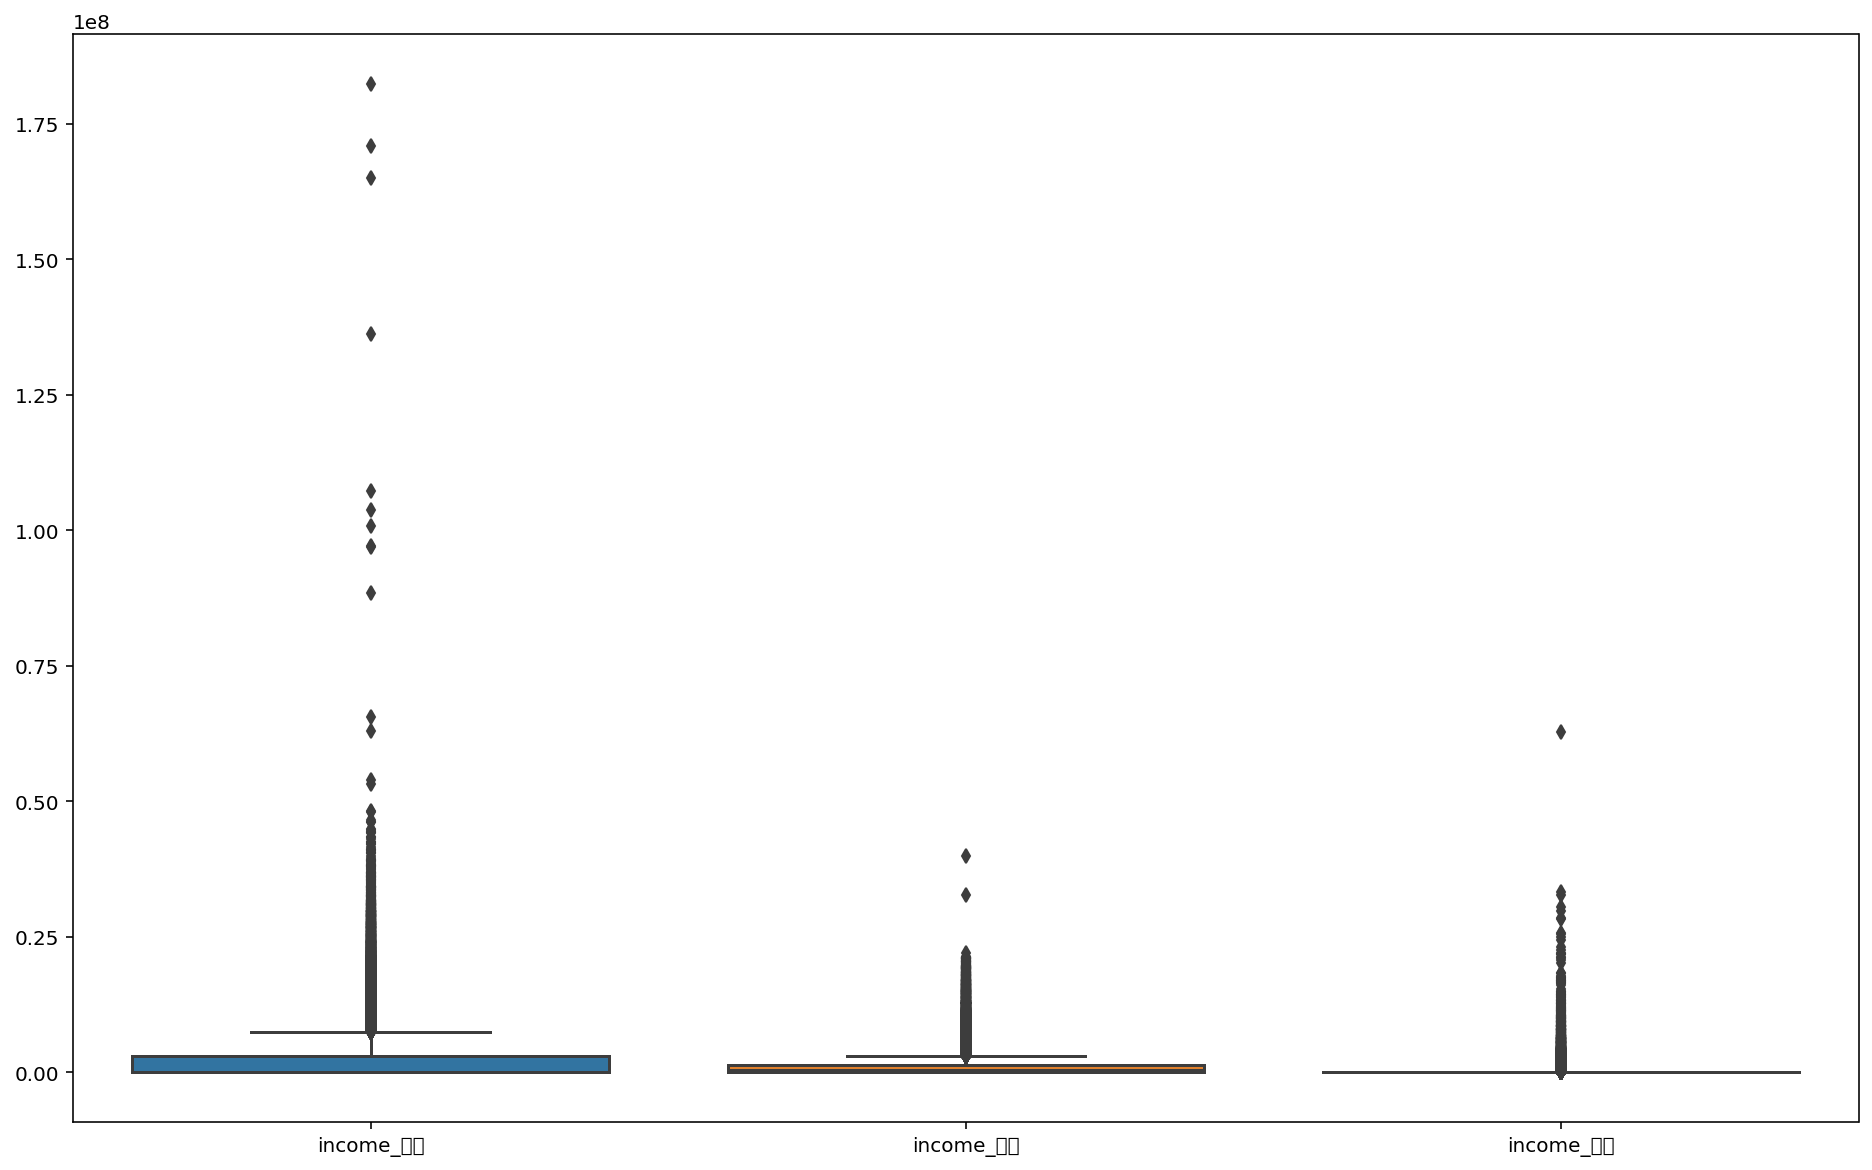

In [38]:
fig, ax = plt.subplots(figsize=(16, 10))
sns.boxplot(data=df[['income_근로', 'income_사업', 'income_기타']])

In [39]:
df.groupby('환급금_수수료율')['fee'].sum()/df.groupby('환급금_수수료율')['fee'].count()
df[df['fee']==400]
df.query('income_근로 == income_사업 == income_기타 and has_paid == 1') # 1545
df.query('income_근로 == income_사업 == income_기타') # 9226
print(len(df.query('income_근로 == income_사업 == income_기타 and has_paid == 1'))/len(df.query('income_근로 == income_사업 == income_기타')) *100)

16.666666666666664


In [40]:
no_pay = df[df['has_paid']==0].index.tolist()
pay_df = df[~df.index.isin(no_pay)]
nopay_df = df[df.index.isin(no_pay)]
pay_df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율,income_cat,age_group
1,34.0,0,2018,100000.0,1700.0,1,18092000.0,0.0,1815000.0,1.70,0,2
4,26.0,1,2016,114000.0,4300.0,1,0.0,689000.0,0.0,3.77,1,1
5,39.0,1,2015,546000.0,12800.0,1,0.0,3628000.0,213000.0,2.34,1,2
6,40.0,1,2019,4000.0,400.0,1,11512000.0,24000.0,0.0,10.00,0,3
7,23.0,0,2017,10000.0,400.0,1,186000.0,74000.0,0.0,4.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99994,32.0,0,2016,101000.0,3000.0,1,0.0,0.0,0.0,2.97,6,2
99995,27.0,1,2019,301000.0,11900.0,1,0.0,0.0,680000.0,3.95,2,1
99996,62.0,1,2019,77000.0,1300.0,1,0.0,463000.0,0.0,1.69,1,5
99998,24.0,0,2019,34000.0,400.0,1,0.0,204000.0,0.0,1.18,1,1


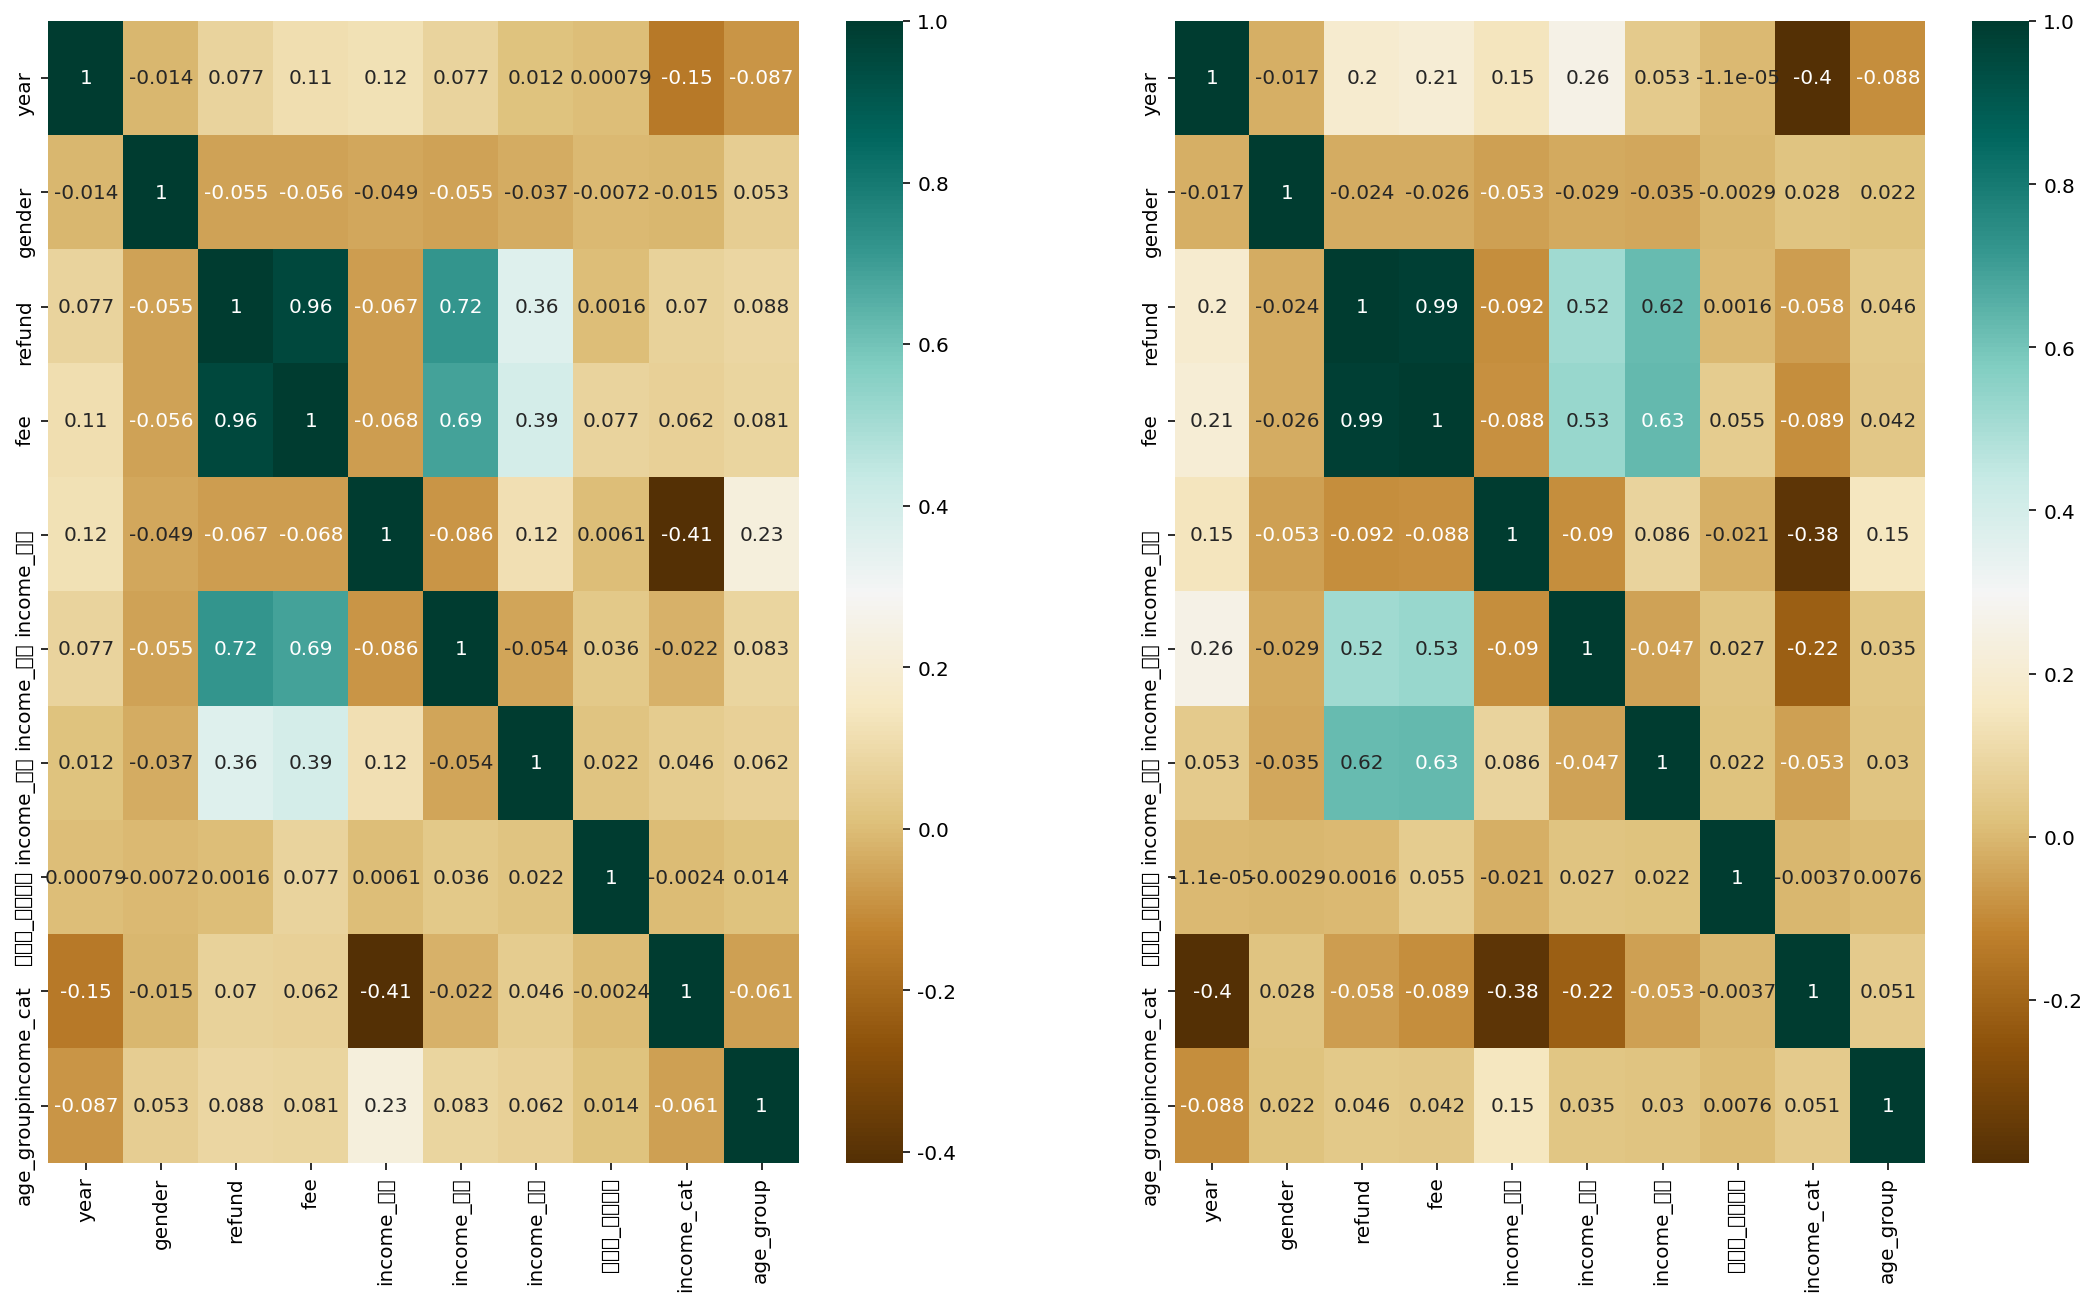

In [41]:
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

mpl.rcParams['axes.unicode_minus'] = False

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
# plt.figure(figsize=(32,15))
fig.set_size_inches(18.5, 10.5)

heat_df = pay_df[['year', 'gender',	'refund',	'fee'	,'income_근로',	'income_사업',	'income_기타',	'환급금_수수료율',	'income_cat', 'age_group']]
heat_df2 = nopay_df[['year', 'gender',	'refund',	'fee'	,'income_근로',	'income_사업',	'income_기타',	'환급금_수수료율',	'income_cat', 'age_group']]
# mask = np.zeros_like(heat_df.corr())
# mask[np.triu_indices_from(mask)] = True
sns.heatmap(heat_df.corr(), cmap='BrBG', annot = True, cbar=True , ax=ax1)
sns.heatmap(heat_df2.corr(), cmap='BrBG', annot = True, cbar=True , ax=ax2)

plt.show()

In [42]:
pay_df.describe()

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율,income_cat,age_group
count,64607.000000,64607.000000,64607.000000,6.460700e+04,64607.000000,64607.0,6.460700e+04,6.460700e+04,6.460700e+04,64607.000000,64607.000000,64607.000000
mean,28.867584,0.485582,2017.961630,1.870311e+05,6210.878078,1.0,2.810846e+06,1.158165e+06,1.344101e+05,3.300108,0.832402,1.427771
std,7.704470,0.499920,1.455443,2.544917e+05,9626.993285,0.0,5.387591e+06,2.066486e+06,6.525481e+05,9.610540,1.003918,0.793929
min,15.000000,0.000000,2015.000000,1.000000e+03,400.000000,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.560000,0.000000,0.000000
25%,24.000000,0.000000,2017.000000,3.500000e+04,400.000000,1.0,0.000000e+00,8.500000e+04,0.000000e+00,1.760000,0.000000,1.000000
50%,27.000000,0.000000,2018.000000,9.400000e+04,3000.000000,1.0,0.000000e+00,4.220000e+05,0.000000e+00,2.860000,1.000000,1.000000
75%,31.000000,1.000000,2019.000000,2.320000e+05,8500.000000,1.0,3.563500e+06,1.263000e+06,1.100000e+04,3.920000,1.000000,2.000000
max,81.000000,2.000000,2020.000000,7.725000e+06,307000.000000,1.0,1.823350e+08,3.993400e+07,3.323500e+07,1595.000000,6.000000,5.000000


In [43]:
len(no_pay)

35317

In [44]:
### 연령대 별 구분
print('10대, 결제한 사람은 {} 명 전체 이용한 사람대비 비율은 {} % 결제한 사람 대비율 {}%'.format(len(df.query('age_group == 0 and has_paid == 1')), round(len(df.query('age_group == 0 and has_paid == 1'))/len(df.index),4)*100, round(len(df.query('age_group == 0 and has_paid == 0'))/len(pay_df.index),4)*100 ))
print('20대, 결제한 사람은 {} 명 전체 이용한 사람대비 비율은 {} % 결제한 사람 대비 비율은 {} %'.format(len(df.query('age_group == 1 and has_paid == 1')), round(len(df.query('age_group == 1 and has_paid == 1'))/len(df.index),4)*100, round(len(df.query('age_group == 1 and has_paid == 0'))/len(pay_df.index),4)*100 ))
print('30대, 결제한 사람은 {} 명 전체 이용한 사람대비 비율은 {} % 결제한 사람 대비 비율은 {} %'.format(len(df.query('age_group == 2 and has_paid == 1')), round(len(df.query('age_group == 2 and has_paid == 1'))/len(df.index),4)*100, round(len(df.query('age_group == 2 and has_paid == 0'))/len(pay_df),4)*100 ))
print('40대, 결제한 사람은 {} 명 전체 이용한 사람대비 비율은 {} % 결제한 사람 대비 비율은 {} %'.format(len(df.query('age_group == 3 and has_paid == 1')), round(len(df.query('age_group == 3 and has_paid == 1'))/len(df.index),4)*100, round(len(df.query('age_group == 3 and has_paid == 0'))/len(pay_df.index),4)*100 ))
print('50대, 결제한 사람은 {} 명 전체 이용한 사람대비 비율은 {} % 결제한 사람 대비 비율은 {} %'.format(len(df.query('age_group == 4 and has_paid == 1')), round(len(df.query('age_group == 4 and has_paid == 1'))/len(df.index),4)*100, round(len(df.query('age_group == 4 and has_paid == 0'))/len(pay_df.index),4)*100 ))
print('60대 이상, 결제한 사람은 {} 명 전체 이용한 사람대비 비율은 {} % 결제한 사람 대비 비율은 {} %'.format(len(df.query('age_group == 5 and has_paid == 1')), round(len(df.query('age_group == 5 and has_paid == 1'))/len(df.index),4)*100, round(len(df.query('age_group == 5 and has_paid == 0'))/len(pay_df.index),4)*100 ))


10대, 결제한 사람은 886 명 전체 이용한 사람대비 비율은 0.89 % 결제한 사람 대비율 0.61%
20대, 결제한 사람은 43745 명 전체 이용한 사람대비 비율은 43.78 % 결제한 사람 대비 비율은 35.9 %
30대, 결제한 사람은 14085 명 전체 이용한 사람대비 비율은 14.099999999999998 % 결제한 사람 대비 비율은 12.49 %
40대, 결제한 사람은 3600 명 전체 이용한 사람대비 비율은 3.5999999999999996 % 결제한 사람 대비 비율은 3.56 %
50대, 결제한 사람은 1926 명 전체 이용한 사람대비 비율은 1.9300000000000002 % 결제한 사람 대비 비율은 1.8499999999999999 %
60대 이상, 결제한 사람은 365 명 전체 이용한 사람대비 비율은 0.37 % 결제한 사람 대비 비율은 0.26 %


In [45]:
### 이용자의 연령대별 구분
print('10대 이용자 수는 ',len(df.query('age_group==0')),'\t10대 이용자 비율',round(len(df.query('age_group==0'))/len(df), 4)*100)
print('20대 이용자 수는 ',len(df.query('age_group==1')),'\t20대 이용자 비율',round(len(df.query('age_group==1'))/len(df), 4)*100)
print('30대 이용자 수는 ',len(df.query('age_group==2')),'\t30대 이용자 비율',round(len(df.query('age_group==2'))/len(df), 4)*100)
print('40대 이용자 수는 ',len(df.query('age_group==3')),'\t40대 이용자 비율',round(len(df.query('age_group==3'))/len(df), 4)*100)
print('50대 이용자 수는 ',len(df.query('age_group==4')),'\t50대 이용자 비율',round(len(df.query('age_group==4'))/len(df), 4)*100)
print('60대 이용자 수는 ',len(df.query('age_group==5')),'\t60대 이상 이용자 비율',round(len(df.query('age_group==5'))/len(df), 4)*100)


10대 이용자 수는  1279 	10대 이용자 비율 1.28
20대 이용자 수는  66936 	20대 이용자 비율 66.99000000000001
30대 이용자 수는  22156 	30대 이용자 비율 22.17
40대 이용자 수는  5900 	40대 이용자 비율 5.8999999999999995
50대 이용자 수는  3121 	50대 이용자 비율 3.1199999999999997
60대 이용자 수는  532 	60대 이상 이용자 비율 0.53


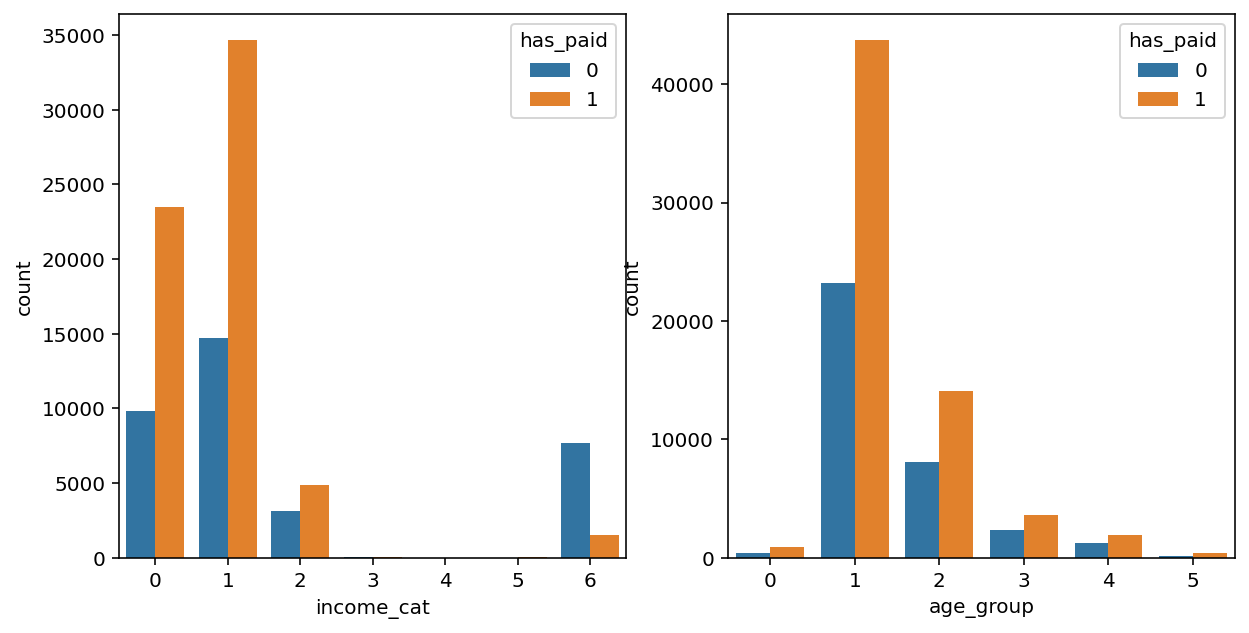

In [46]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(10,5)

sns.countplot(data=df, x="income_cat", hue='has_paid', ax=ax1)
sns.countplot(data=df, x="age_group", hue='has_paid', ax=ax2)

plt.show()

income category 1 > 0 > 2 > 6 순으로 결제를 많이 함  
age_group 20대 > 30대 > 40대 > 50대 > 10대 > 60대 이상 순으로 결제

In [47]:
print(len(df[df['has_paid']==True])+ len(df[df['has_paid']==False]))
print(len(df[df['has_paid']==True]))
print('남자 결제 인원',len(df.query('gender == 0 and has_paid == 1')))
print('여자 결제 인원',len(df.query('gender == 1 and has_paid == 1')))


99924
64607
남자 결제 인원 33239
여자 결제 인원 31364


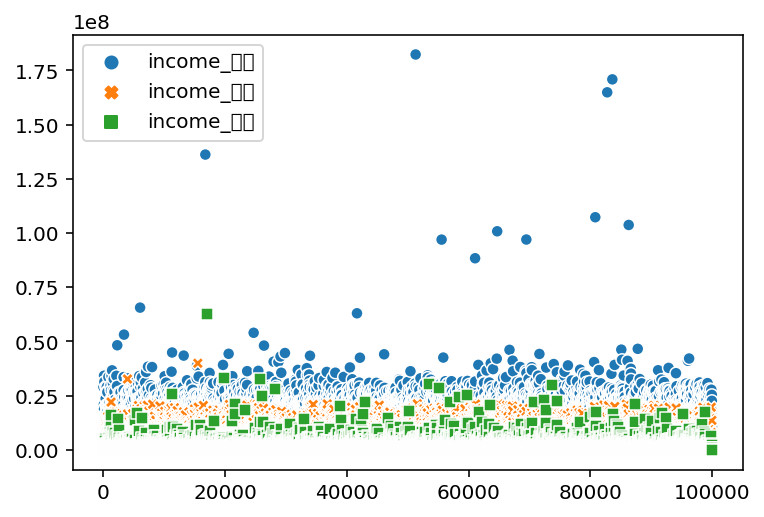

In [48]:
sns.scatterplot(data=df[['income_근로', 'income_사업', 'income_기타']])

In [49]:
df['income'] = df['income_근로'] + df['income_사업'] + df['income_기타']
df['revenue'] = df['has_paid'] * df['fee']
df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율,income_cat,age_group,income,revenue
0,27.0,1,2019,5000.0,400.0,0,10001000.0,61000.0,0.0,8.00,0,1,10062000.0,0.0
1,34.0,0,2018,100000.0,1700.0,1,18092000.0,0.0,1815000.0,1.70,0,2,19907000.0,1700.0
2,28.0,1,2017,289000.0,11500.0,0,0.0,1461000.0,0.0,3.98,1,1,1461000.0,0.0
3,27.0,0,2019,410000.0,16200.0,0,0.0,2471000.0,0.0,3.95,1,1,2471000.0,0.0
4,26.0,1,2016,114000.0,4300.0,1,0.0,689000.0,0.0,3.77,1,1,689000.0,4300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,27.0,1,2019,301000.0,11900.0,1,0.0,0.0,680000.0,3.95,2,1,680000.0,11900.0
99996,62.0,1,2019,77000.0,1300.0,1,0.0,463000.0,0.0,1.69,1,5,463000.0,1300.0
99997,24.0,0,2020,9000.0,400.0,0,7923000.0,54000.0,0.0,4.44,0,1,7977000.0,0.0
99998,24.0,0,2019,34000.0,400.0,1,0.0,204000.0,0.0,1.18,1,1,204000.0,400.0


In [50]:
### 소득 0// 결제 인원
print(len(df.query('income == 0 and has_paid == 0')))
### 소득 0// 결제 인원 중 수수료율 10이하
print('수수료율 10이하',len(df.query('income == 0 and has_paid == 1 and 환급금_수수료율 <= 10')))

7650
수수료율 10이하 1528


In [51]:
df.query('환급금_수수료율 > 10')['refund'].describe()

count       441.000000
mean      40070.294785
std       62380.482467
min        1000.000000
25%        4000.000000
50%       19000.000000
75%       51000.000000
max      529000.000000
Name: refund, dtype: float64

In [52]:
df.query('has_paid == 1 and 환급금_수수료율 <= 10')
### 대부분 수수료율은 10 % 이하

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율,income_cat,age_group,income,revenue
1,34.0,0,2018,100000.0,1700.0,1,18092000.0,0.0,1815000.0,1.70,0,2,19907000.0,1700.0
4,26.0,1,2016,114000.0,4300.0,1,0.0,689000.0,0.0,3.77,1,1,689000.0,4300.0
5,39.0,1,2015,546000.0,12800.0,1,0.0,3628000.0,213000.0,2.34,1,2,3841000.0,12800.0
6,40.0,1,2019,4000.0,400.0,1,11512000.0,24000.0,0.0,10.00,0,3,11536000.0,400.0
7,23.0,0,2017,10000.0,400.0,1,186000.0,74000.0,0.0,4.00,0,1,260000.0,400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,32.0,0,2016,101000.0,3000.0,1,0.0,0.0,0.0,2.97,6,2,0.0,3000.0
99995,27.0,1,2019,301000.0,11900.0,1,0.0,0.0,680000.0,3.95,2,1,680000.0,11900.0
99996,62.0,1,2019,77000.0,1300.0,1,0.0,463000.0,0.0,1.69,1,5,463000.0,1300.0
99998,24.0,0,2019,34000.0,400.0,1,0.0,204000.0,0.0,1.18,1,1,204000.0,400.0


In [53]:
df.query('has_paid == 1 and 환급금_수수료율 == 10 and fee != 400')

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율,income_cat,age_group,income,revenue
22914,22.0,1,2018,43000.0,4300.0,1,8242000.0,609000.0,0.0,10.0,0,1,8851000.0,4300.0
75836,34.0,0,2016,128000.0,12800.0,1,2976000.0,4847000.0,0.0,10.0,1,2,7823000.0,12800.0
79692,27.0,0,2017,9000.0,900.0,1,4436000.0,53000.0,200000.0,10.0,0,1,4689000.0,900.0
83882,30.0,1,2016,106000.0,10600.0,1,0.0,1229000.0,0.0,10.0,1,2,1229000.0,10600.0
86547,42.0,1,2016,43000.0,4300.0,1,7032000.0,674000.0,0.0,10.0,0,3,7706000.0,4300.0
89365,33.0,1,2019,106000.0,10600.0,1,21805000.0,638000.0,0.0,10.0,0,2,22443000.0,10600.0


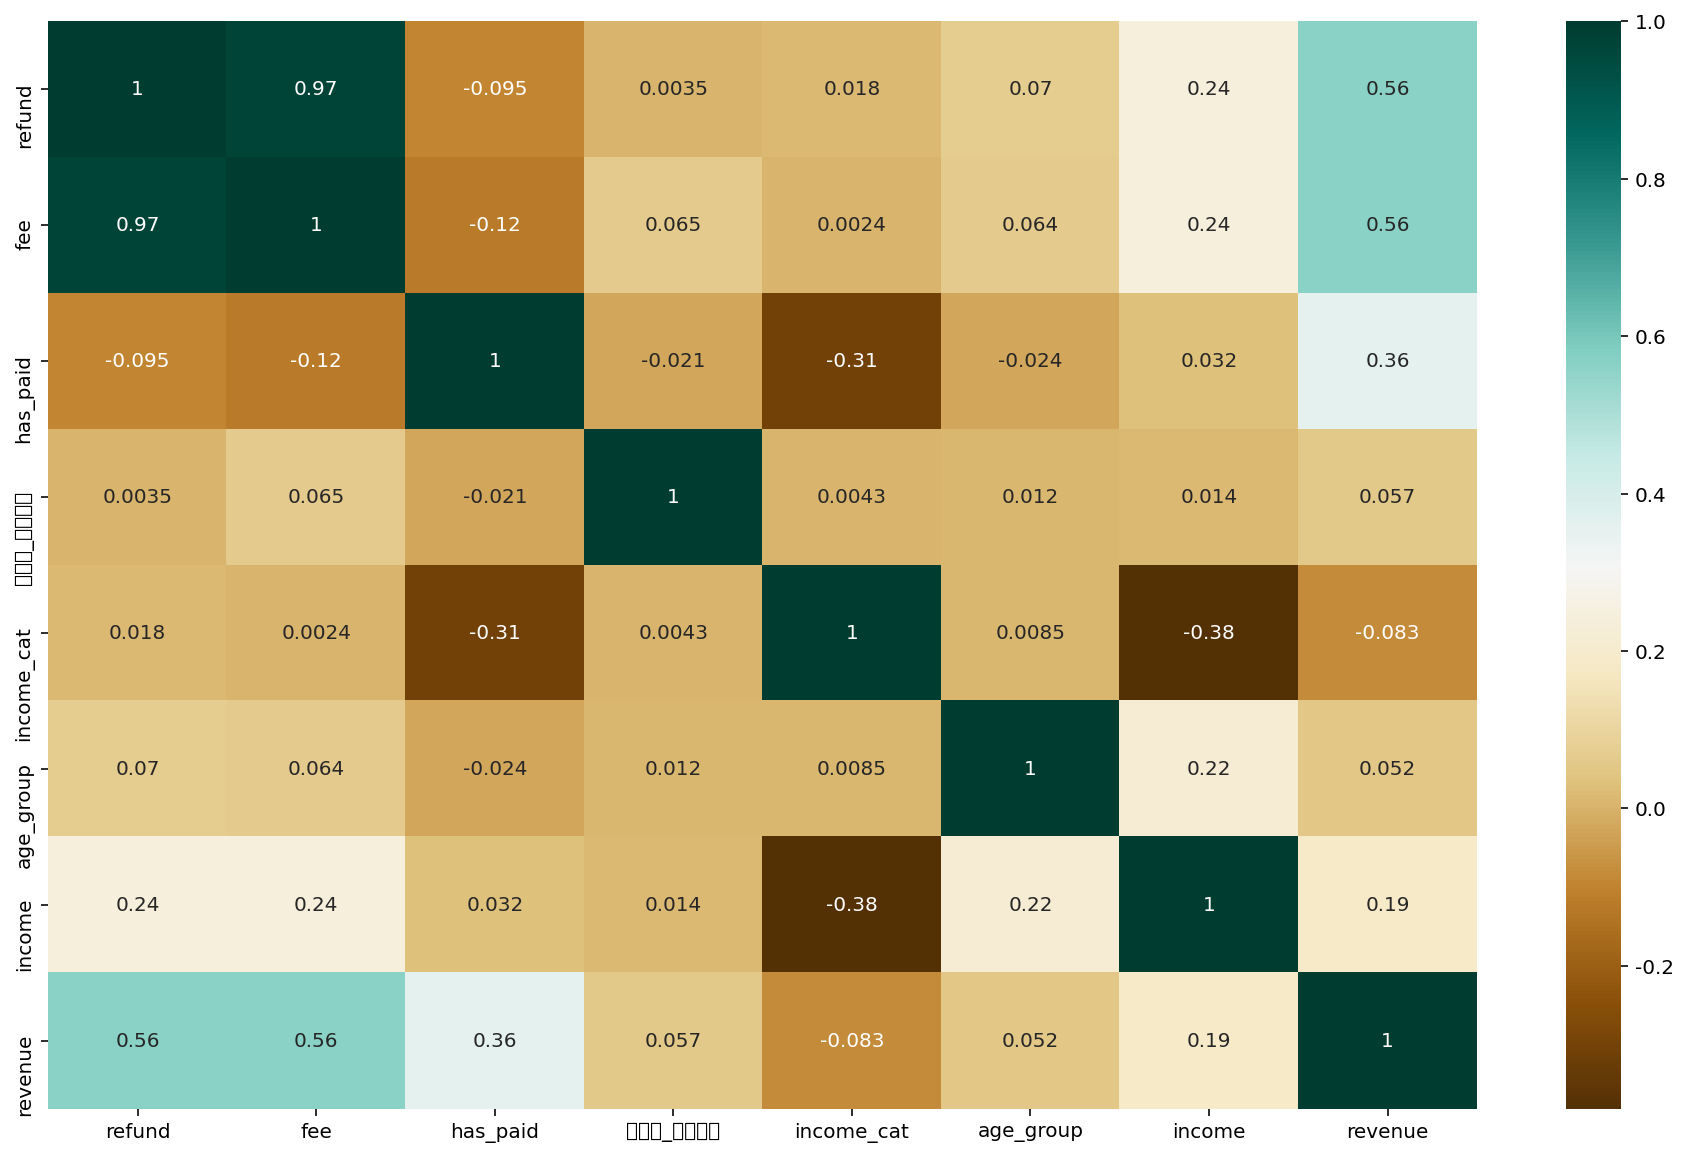

In [54]:
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

mpl.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize=(16, 10))

heat_df = df[[	'refund',	'fee'	,'has_paid'	,'환급금_수수료율',	'income_cat', 'age_group', 'income', 'revenue']]
# mask = np.zeros_like(heat_df.corr())
# mask[np.triu_indices_from(mask)] = True
sns.heatmap(heat_df.corr(), cmap='BrBG', annot = True, cbar=True )

plt.show()

etc_df
income 과 refund
income 과 fee
refund 와 fee



In [55]:
### 각 소득을 비율로 
df['income_emp'] = round(df['income_근로']/df['income'], 4) *100
df['income_bus'] = round(df['income_사업']/df['income'], 4) *100
df['income_etc'] = round(df['income_기타']/df['income'], 4) *100
df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율,income_cat,age_group,income,revenue,income_emp,income_bus,income_etc
0,27.0,1,2019,5000.0,400.0,0,10001000.0,61000.0,0.0,8.00,0,1,10062000.0,0.0,99.39,0.61,0.00
1,34.0,0,2018,100000.0,1700.0,1,18092000.0,0.0,1815000.0,1.70,0,2,19907000.0,1700.0,90.88,0.00,9.12
2,28.0,1,2017,289000.0,11500.0,0,0.0,1461000.0,0.0,3.98,1,1,1461000.0,0.0,0.00,100.00,0.00
3,27.0,0,2019,410000.0,16200.0,0,0.0,2471000.0,0.0,3.95,1,1,2471000.0,0.0,0.00,100.00,0.00
4,26.0,1,2016,114000.0,4300.0,1,0.0,689000.0,0.0,3.77,1,1,689000.0,4300.0,0.00,100.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,27.0,1,2019,301000.0,11900.0,1,0.0,0.0,680000.0,3.95,2,1,680000.0,11900.0,0.00,0.00,100.00
99996,62.0,1,2019,77000.0,1300.0,1,0.0,463000.0,0.0,1.69,1,5,463000.0,1300.0,0.00,100.00,0.00
99997,24.0,0,2020,9000.0,400.0,0,7923000.0,54000.0,0.0,4.44,0,1,7977000.0,0.0,99.32,0.68,0.00
99998,24.0,0,2019,34000.0,400.0,1,0.0,204000.0,0.0,1.18,1,1,204000.0,400.0,0.00,100.00,0.00


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


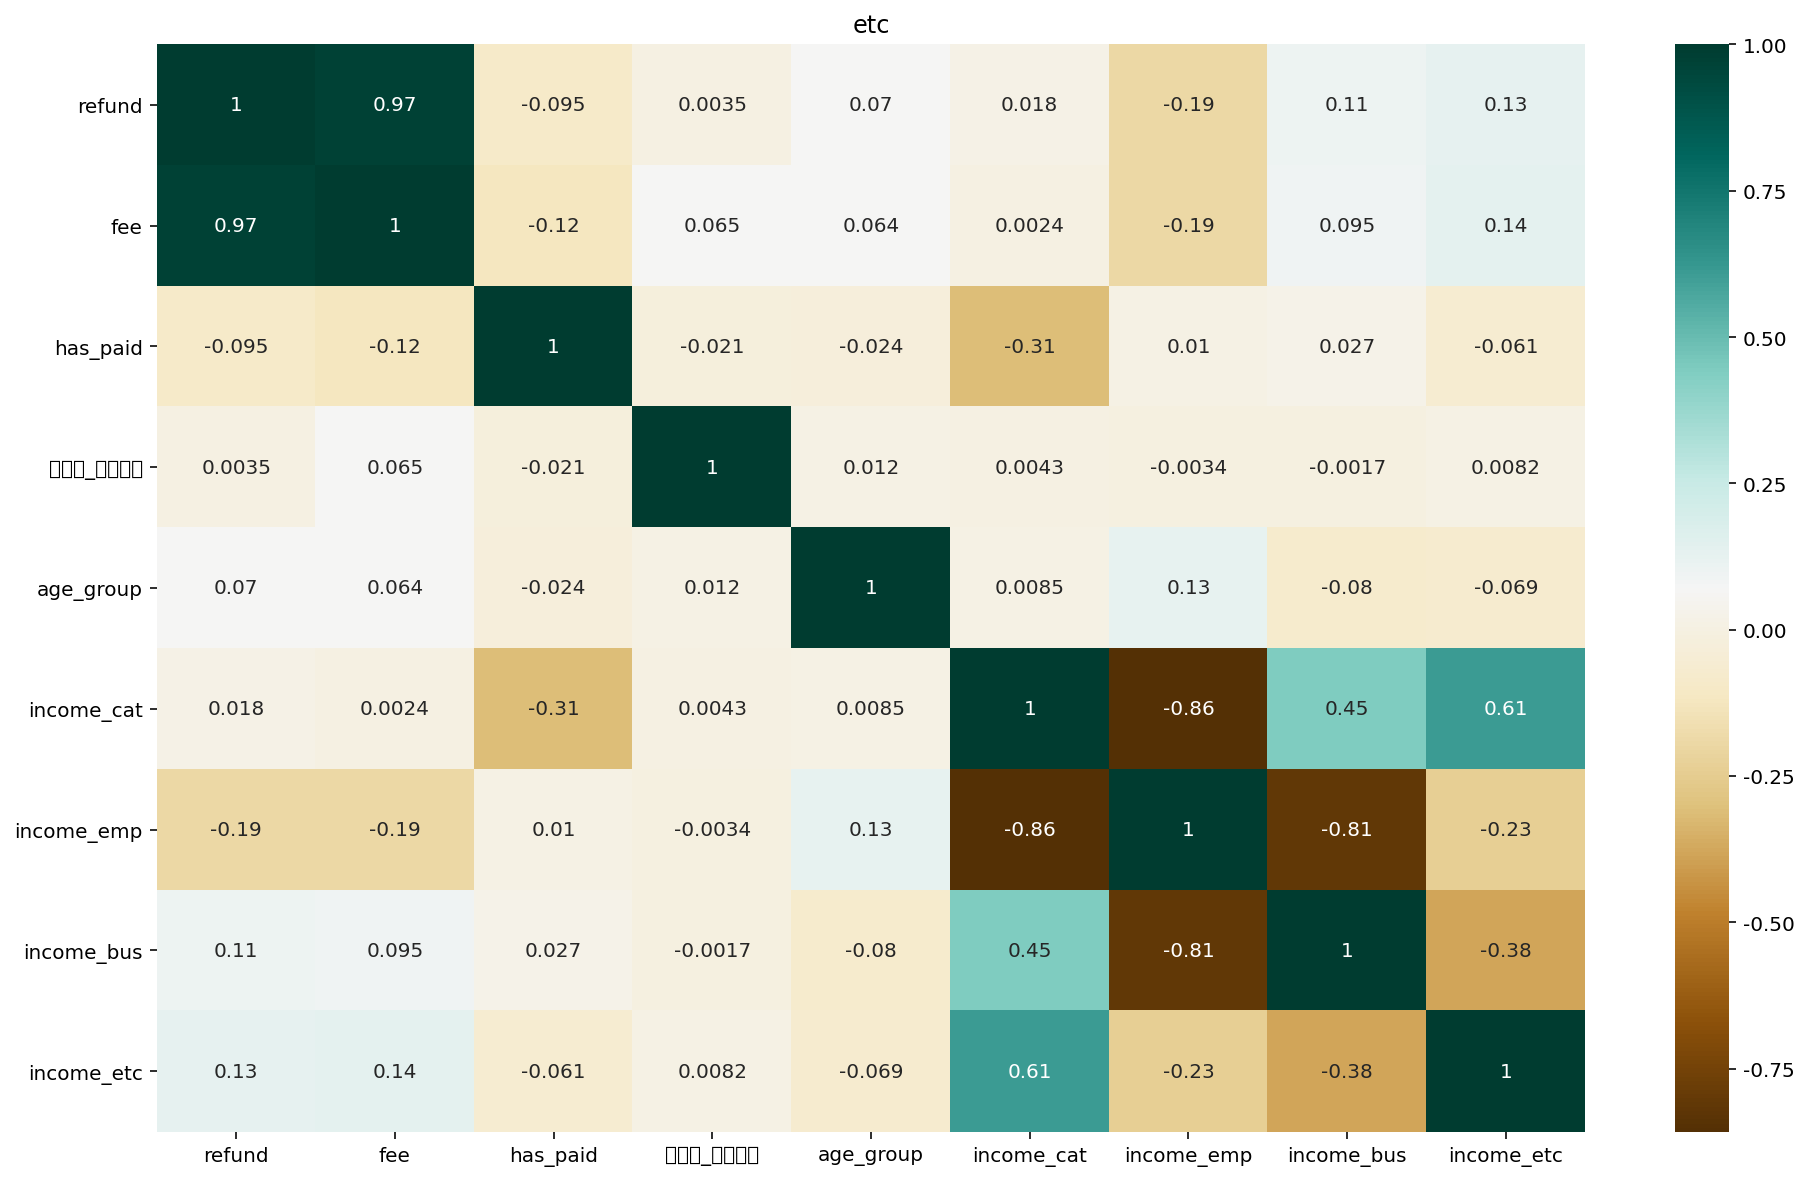

In [56]:
fig, ax = plt.subplots(figsize=(16, 10))
heat_df = df[[	'refund',	'fee'	,'has_paid'	,'환급금_수수료율','age_group', 'income_cat','income_emp', 'income_bus', 'income_etc']]
# mask = np.zeros_like(heat_df.corr())
# mask[np.triu_indices_from(mask)] = True
sns.heatmap(heat_df.corr(), cmap='BrBG', annot = True, cbar=True )
plt.title('etc')

plt.show()

In [57]:
### 결제 비율로 봤을 때, 사업 소득이 가장 높은 그룹이 결제 비율이 가장 높음.
print('근로',round(len(emp_df.query('has_paid == 0').index.tolist()) / len(df.query('has_paid == 0')), 4) *100)
print('사업',round(len(bus_df.query('has_paid == 0').index.tolist()) / len(df.query('has_paid == 0')), 4) *100)
print('기타',round(len(etc_df.query('has_paid == 0').index.tolist()) / len(df.query('has_paid == 0')), 4) *100)
print('소득 0 :',round(len(no_df.query('has_paid == 0').index.tolist()) / len(df.query('has_paid == 0')), 4) *100)

근로 27.82
사업 41.65
기타 8.84
소득 0 : 21.69


In [58]:
## 이용자 결제 비율
len(df[df['has_paid']==0])/len(df) * 100

35.34386133461431

In [59]:
df.query('has_paid == 1 and refund == refund.max()')

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율,income_cat,age_group,income,revenue,income_emp,income_bus,income_etc
61745,25.0,1,2018,7725000.0,307000.0,1,2850000.0,0.0,17297000.0,3.97,2,1,20147000.0,307000.0,14.15,0.0,85.85


In [60]:
df.query('has_paid == 1 and refund == refund.min()')

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율,income_cat,age_group,income,revenue,income_emp,income_bus,income_etc
5506,30.0,0,2018,1000.0,400.0,1,6005000.0,136000.0,0.0,40.0,0,2,6141000.0,400.0,97.79,2.21,0.0
6135,40.0,1,2017,1000.0,400.0,1,7934000.0,76000.0,0.0,40.0,0,3,8010000.0,400.0,99.05,0.95,0.0
9992,37.0,1,2018,1000.0,400.0,1,8121000.0,56000.0,0.0,40.0,0,2,8177000.0,400.0,99.32,0.68,0.0
24151,31.0,1,2016,1000.0,400.0,1,12243000.0,58000.0,0.0,40.0,0,2,12301000.0,400.0,99.53,0.47,0.0
30668,28.0,0,2019,1000.0,400.0,1,12667000.0,74000.0,0.0,40.0,0,1,12741000.0,400.0,99.42,0.58,0.0
34177,27.0,1,2018,1000.0,400.0,1,9012000.0,45000.0,0.0,40.0,0,1,9057000.0,400.0,99.50,0.50,0.0
34370,39.0,1,2019,1000.0,400.0,1,8904000.0,61000.0,0.0,40.0,0,2,8965000.0,400.0,99.32,0.68,0.0
36056,37.0,0,2017,1000.0,400.0,1,0.0,95000.0,0.0,40.0,1,2,95000.0,400.0,0.00,100.00,0.0
38906,25.0,1,2017,1000.0,400.0,1,13007000.0,25000.0,0.0,40.0,0,1,13032000.0,400.0,99.81,0.19,0.0
39648,32.0,0,2019,1000.0,400.0,1,11655000.0,152000.0,0.0,40.0,0,2,11807000.0,400.0,98.71,1.29,0.0


In [61]:
df['refund'].describe()
df[df['refund']>9.9000]

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율,income_cat,age_group,income,revenue,income_emp,income_bus,income_etc
0,27.0,1,2019,5000.0,400.0,0,10001000.0,61000.0,0.0,8.00,0,1,10062000.0,0.0,99.39,0.61,0.00
1,34.0,0,2018,100000.0,1700.0,1,18092000.0,0.0,1815000.0,1.70,0,2,19907000.0,1700.0,90.88,0.00,9.12
2,28.0,1,2017,289000.0,11500.0,0,0.0,1461000.0,0.0,3.98,1,1,1461000.0,0.0,0.00,100.00,0.00
3,27.0,0,2019,410000.0,16200.0,0,0.0,2471000.0,0.0,3.95,1,1,2471000.0,0.0,0.00,100.00,0.00
4,26.0,1,2016,114000.0,4300.0,1,0.0,689000.0,0.0,3.77,1,1,689000.0,4300.0,0.00,100.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,27.0,1,2019,301000.0,11900.0,1,0.0,0.0,680000.0,3.95,2,1,680000.0,11900.0,0.00,0.00,100.00
99996,62.0,1,2019,77000.0,1300.0,1,0.0,463000.0,0.0,1.69,1,5,463000.0,1300.0,0.00,100.00,0.00
99997,24.0,0,2020,9000.0,400.0,0,7923000.0,54000.0,0.0,4.44,0,1,7977000.0,0.0,99.32,0.68,0.00
99998,24.0,0,2019,34000.0,400.0,1,0.0,204000.0,0.0,1.18,1,1,204000.0,400.0,0.00,100.00,0.00


In [62]:
df.fillna(0, inplace=True)

In [63]:
(df['refund'] *0.1).sum()/ df['fee'].sum()

2.875431210487039

In [64]:
df['refund'].describe()

count    9.992400e+04
mean     2.084587e+05
std      3.058478e+05
min      1.000000e+03
25%      3.300000e+04
50%      9.900000e+04
75%      2.540000e+05
max      7.725000e+06
Name: refund, dtype: float64

In [65]:
print(len(df[df['refund'] >= 2.540000e+05]))
print(len(df[df['refund'] >= 9.900000e+04]))
print(len(df[df['refund'] >= 3.300000e+04]))


25043
50076
75018


In [66]:
df['fee'].describe()

count     99924.000000
mean       7249.651735
std       11929.564466
min         400.000000
25%         400.000000
50%        4300.000000
75%        8500.000000
max      307000.000000
Name: fee, dtype: float64

In [67]:
df['환급금_수수료율'].describe()

count    99924.000000
mean         3.434262
std          8.505295
min          0.560000
25%          1.830000
50%          3.330000
75%          3.940000
max       1595.000000
Name: 환급금_수수료율, dtype: float64

In [68]:
df['fee'].sum() / df['refund'].sum() *100
## 수수료 50%(중위값)  3.33
## 
## 전체 환급금 대비 수수료율 3.4791


3.477739256473538

In [69]:
df[df['fee']==df['fee'].max()]
df[df['환급금_수수료율']==df['환급금_수수료율'].max()]
wl = df.query('refund <= fee').index.tolist()
df = df[~df.index.isin(wl)]

In [70]:
df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율,income_cat,age_group,income,revenue,income_emp,income_bus,income_etc
0,27.0,1,2019,5000.0,400.0,0,10001000.0,61000.0,0.0,8.00,0,1,10062000.0,0.0,99.39,0.61,0.00
1,34.0,0,2018,100000.0,1700.0,1,18092000.0,0.0,1815000.0,1.70,0,2,19907000.0,1700.0,90.88,0.00,9.12
2,28.0,1,2017,289000.0,11500.0,0,0.0,1461000.0,0.0,3.98,1,1,1461000.0,0.0,0.00,100.00,0.00
3,27.0,0,2019,410000.0,16200.0,0,0.0,2471000.0,0.0,3.95,1,1,2471000.0,0.0,0.00,100.00,0.00
4,26.0,1,2016,114000.0,4300.0,1,0.0,689000.0,0.0,3.77,1,1,689000.0,4300.0,0.00,100.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,27.0,1,2019,301000.0,11900.0,1,0.0,0.0,680000.0,3.95,2,1,680000.0,11900.0,0.00,0.00,100.00
99996,62.0,1,2019,77000.0,1300.0,1,0.0,463000.0,0.0,1.69,1,5,463000.0,1300.0,0.00,100.00,0.00
99997,24.0,0,2020,9000.0,400.0,0,7923000.0,54000.0,0.0,4.44,0,1,7977000.0,0.0,99.32,0.68,0.00
99998,24.0,0,2019,34000.0,400.0,1,0.0,204000.0,0.0,1.18,1,1,204000.0,400.0,0.00,100.00,0.00


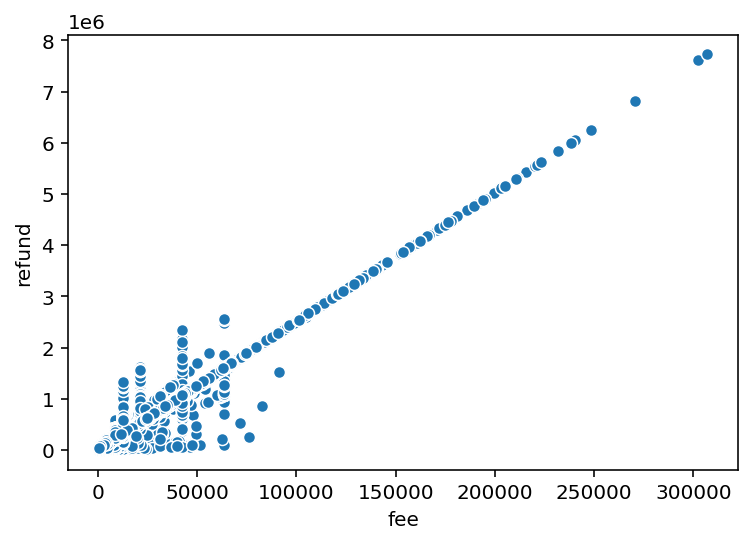

In [71]:
sns.scatterplot(data=df, x='fee', y = 'refund')
# sns.regplot(data=df, x='fee', y = 'refund')

## 수수료 총 합계를 늘릴 수 있는 방법?

1. 새로운 수수료 율 설정
- 현재 수수료율은 환급액에 비례하지 않음.
- 환급금과 수수료는 비례.

min           -inf  
25%           1.83  
50%           3.33  
75%           3.94  
max            inf  

## 결제율을 늘릴 수 있는 방법?
1. 환급액이 많을 수록? 결제를 많이 할까?
2. 연령대에 따른 이용율 및 결제율
-  이용 연령대가 주로 20~30대, 실제 결제 인원의 80% 이상.

2. 환급액이 마이너스(-) 인데도 결제 => 왜죠...??
3. 환급 절차가 수수료를 먼저 결제하고 환급을 받기 때문...? => 프로세스를 바꿔야함?

성별데이터 없는 것들 (-) 인 것들 어떻게 할 지 여부


In [72]:
## 년도별 결제율
print(len(df15.query('has_paid == True'))/len(df15))
print(len(df16.query('has_paid == True'))/len(df16))
print(len(df17.query('has_paid == True'))/len(df17))
print(len(df18.query('has_paid == True'))/len(df18))
print(len(df19.query('has_paid == True'))/len(df19))
print(len(df20.query('has_paid == True'))/len(df20))

df15.fillna(0, inplace=True)
df16.fillna(0, inplace=True)
df17.fillna(0, inplace=True)
df18.fillna(0, inplace=True)
df19.fillna(0, inplace=True)
df20.fillna(0, inplace=True)

df15['환급금_수수료율'] = round(df15['fee']/df15['refund'], 4) *100
df16['환급금_수수료율'] = round(df16['fee']/df16['refund'], 4) *100
df17['환급금_수수료율'] = round(df17['fee']/df17['refund'], 4) *100
df18['환급금_수수료율'] = round(df18['fee']/df18['refund'], 4) *100
df19['환급금_수수료율'] = round(df19['fee']/df19['refund'], 4) *100
df20['환급금_수수료율'] = round(df20['fee']/df20['refund'], 4) *100
print('======환급금 수수료율_년도별_평균')
print(df15['환급금_수수료율'].mean())
print(df16['환급금_수수료율'].mean())
print(df17['환급금_수수료율'].mean())
print(df18['환급금_수수료율'].mean())
print(df19['환급금_수수료율'].mean())
print(df20['환급금_수수료율'].mean())

df20
## 2020 년 결제율이 떨어진 이유?
# 1. 손택스 (국세청 앱)에서 신청이 가능해짐

0.7149022594567149
0.6969871287840655
0.6975813368402997
0.6949491915703059
0.6947777671114524
0.48532256707881233
======환급금 수수료율_년도별_평균
2.990322416857059
3.4291407205004933
3.4481113842987394
3.4635650998648737
3.5645036958817546
3.3618756834048575


,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율
11,25.0,1,2020,753000.0,29800.0,0,0.0,0.0,1828000.0,3.96
15,27.0,0,2020,6000.0,400.0,1,3427000.0,33000.0,0.0,6.67
17,34.0,1,2020,116000.0,4300.0,0,55000.0,701000.0,0.0,3.71
19,22.0,0,2020,396000.0,15700.0,0,873000.0,2385000.0,0.0,3.96
21,48.0,1,2020,454000.0,17900.0,1,0.0,2737000.0,0.0,3.94
...,...,...,...,...,...,...,...,...,...,...
99962,32.0,0,2020,35000.0,400.0,1,18037000.0,88000.0,0.0,1.14
99964,25.0,1,2020,381000.0,14900.0,0,0.0,2296000.0,0.0,3.91
99976,34.0,0,2020,1248000.0,49300.0,1,0.0,13589000.0,0.0,3.95
99982,28.0,1,2020,94000.0,1700.0,1,10636000.0,0.0,85000.0,1.81


In [73]:
len(df)

99870

In [74]:
bus_df.fee.mean()

8773.82905048296

In [75]:
emp_df.fee.mean()

4447.14856301991

In [76]:
etc_df.fee.mean()

12855.294705294706

In [77]:
etc_df.query('income_근로 == 0 and income_사업 == 0')['fee'].mean()

11521.875566842009

In [78]:
etc_df.query('income_근로 != 0 or income_사업 != 0')['fee'].mean()
# 기타 소득에서 사업소득이나 근로소득이 0이 아닌 경우의 평균이 높음 -> 사업소득의 영향을 많이 받는 탓

15801.643286573146

In [79]:
df.describe()

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율,income_cat,age_group,income,revenue,income_emp,income_bus,income_etc
count,99870.000000,99870.000000,99870.000000,9.987000e+04,99870.000000,99870.000000,9.987000e+04,9.987000e+04,9.987000e+04,99870.000000,99870.000000,99870.000000,9.987000e+04,99870.000000,99870.000000,99870.000000,99870.000000
mean,28.998518,0.495404,2018.112827,2.085670e+05,7243.824972,0.646541,2.623099e+06,1.183053e+06,1.606266e+05,3.294575,1.207540,1.441894,3.966779e+06,4011.552018,30.692154,51.171498,8.949404
std,7.768228,0.500422,1.494889,3.058951e+05,11924.312666,0.478046,5.260745e+06,2.255051e+06,7.959170e+05,2.643611,1.634342,0.800952,5.654787e+06,8282.592612,40.956631,44.911741,25.484438
min,15.000000,0.000000,2015.000000,1.000000e+03,400.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.560000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,2017.000000,3.300000e+04,400.000000,0.000000,0.000000e+00,3.100000e+04,0.000000e+00,1.830000,0.000000,1.000000,2.620000e+05,0.000000,0.000000,0.960000,0.000000
50%,27.000000,0.000000,2018.000000,9.900000e+04,4300.000000,1.000000,0.000000e+00,3.290000e+05,0.000000e+00,3.330000,1.000000,1.000000,1.440000e+06,400.000000,0.000000,47.120000,0.000000
75%,31.000000,1.000000,2019.000000,2.540000e+05,8500.000000,1.000000,2.989750e+06,1.235000e+06,2.000000e+03,3.940000,1.000000,2.000000,5.803750e+06,4300.000000,78.380000,100.000000,0.050000
max,81.000000,2.000000,2020.000000,7.725000e+06,307000.000000,1.000000,1.823350e+08,3.993400e+07,6.281000e+07,98.000000,6.000000,5.000000,1.866450e+08,307000.000000,100.000000,100.000000,100.000000


In [231]:
df.fee.sum() #723440800.0
df.refund.sum() * df.환급금_수수료율.mean() #68624625279.68159
df.refund.sum() * 3.33 ## 69362508060.0
723440800/ df.refund.sum() # 0.03473141227702025
df.refund.sum() * 3.47 # 72278649540.0

72278649540.0

In [232]:
### 새로운 수수료 설정 
## 0이하일 경우 최저 수수료율인 3 %
fee_add = []
for i in tqdm(df['refund']):
  if i >= 2.540000e+05:
    fee = 2.1
    fee_add.append(fee)
  elif i >= 9.900000e+04:
    fee = 3.33
    fee_add.append(fee)
  else: 
    fee = 3.94
    fee_add.append(fee)

100%|███████████████████████████████████████████████████████████████████████| 99870/99870 [00:00<00:00, 1763207.23it/s]


In [233]:
df['fee_rat']  = fee_add
df['fee_fix'] = round(df['fee_rat']/100, 4) * df['refund']
df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율,...,income_emp,income_bus,income_etc,fee_rat,fee_fix,refund_log,fee_log,income_근로_log,income_사업_log,income_기타_log
0,27.0,1,2019,5000.0,400.0,0,10001000.0,61000.0,0.0,8.00,...,99.39,0.61,0.00,3.94,197.0,8.517393,5.993961,16.118196,11.018646,0.000000
1,34.0,0,2018,100000.0,1700.0,1,18092000.0,0.0,1815000.0,1.70,...,90.88,0.00,9.12,3.33,3330.0,11.512935,7.438972,16.710980,0.000000,14.411597
2,28.0,1,2017,289000.0,11500.0,0,0.0,1461000.0,0.0,3.98,...,0.00,100.00,0.00,2.10,6069.0,12.574185,9.350189,0.000000,14.194632,0.000000
3,27.0,0,2019,410000.0,16200.0,0,0.0,2471000.0,0.0,3.95,...,0.00,100.00,0.00,2.10,8610.0,12.923915,9.692828,0.000000,14.720134,0.000000
4,26.0,1,2016,114000.0,4300.0,1,0.0,689000.0,0.0,3.77,...,0.00,100.00,0.00,3.33,3796.2,11.643962,8.366603,0.000000,13.442998,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,27.0,1,2019,301000.0,11900.0,1,0.0,0.0,680000.0,3.95,...,0.00,0.00,100.00,2.10,6321.0,12.614869,9.384378,0.000000,0.000000,13.429850
99996,62.0,1,2019,77000.0,1300.0,1,0.0,463000.0,0.0,1.69,...,0.00,100.00,0.00,3.94,3033.8,11.251574,7.170888,0.000000,13.045484,0.000000
99997,24.0,0,2020,9000.0,400.0,0,7923000.0,54000.0,0.0,4.44,...,99.32,0.68,0.00,3.94,354.6,9.105091,5.993961,15.885281,10.896758,0.000000
99998,24.0,0,2019,34000.0,400.0,1,0.0,204000.0,0.0,1.18,...,0.00,100.00,0.00,3.94,1339.6,10.434145,5.993961,0.000000,12.225880,0.000000


In [236]:
df['환급금_수수료율'].mean()
df['fee_rat'].mean()

3.3257089215984412

In [237]:
print(df.fee_fix.sum())
print(df.fee.sum())

522700322.79999995
723440800.0


In [84]:
df[df['refund']<0]

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율,income_cat,age_group,income,revenue,income_emp,income_bus,income_etc,fee_rat,fee_fix


In [85]:
df.sort_values('환급금_수수료율',ascending=True).head(20)

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율,income_cat,age_group,income,revenue,income_emp,income_bus,income_etc,fee_rat,fee_fix
38674,23.0,1,2019,71000.0,400.0,1,6463000.0,425000.0,0.0,0.56,0,1,6888000.0,400.0,93.83,6.17,0.00,2.0,1420.0
31941,23.0,0,2017,71000.0,400.0,0,0.0,0.0,0.0,0.56,6,1,0.0,0.0,0.00,0.00,0.00,2.0,1420.0
69856,33.0,1,2016,71000.0,400.0,1,32703000.0,425000.0,0.0,0.56,0,2,33128000.0,400.0,98.72,1.28,0.00,2.0,1420.0
15147,25.0,1,2017,71000.0,400.0,1,5625000.0,425000.0,0.0,0.56,0,1,6050000.0,400.0,92.98,7.02,0.00,2.0,1420.0
21886,34.0,1,2018,71000.0,400.0,1,1515000.0,425000.0,0.0,0.56,0,2,1940000.0,400.0,78.09,21.91,0.00,2.0,1420.0
78937,27.0,1,2019,71000.0,400.0,1,6748000.0,425000.0,0.0,0.56,0,1,7173000.0,400.0,94.08,5.92,0.00,2.0,1420.0
51565,23.0,1,2018,71000.0,400.0,1,0.0,425000.0,0.0,0.56,1,1,425000.0,400.0,0.00,100.00,0.00,2.0,1420.0
24754,25.0,0,2018,71000.0,400.0,1,1276000.0,425000.0,0.0,0.56,0,1,1701000.0,400.0,75.01,24.99,0.00,2.0,1420.0
66906,28.0,1,2018,71000.0,400.0,1,0.0,425000.0,468000.0,0.56,2,1,893000.0,400.0,0.00,47.59,52.41,2.0,1420.0
28770,23.0,0,2017,71000.0,400.0,1,0.0,425000.0,0.0,0.56,1,1,425000.0,400.0,0.00,100.00,0.00,2.0,1420.0


In [86]:
df[df['refund']==0]

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율,income_cat,age_group,income,revenue,income_emp,income_bus,income_etc,fee_rat,fee_fix


In [87]:
df['fee_fix'].sum() / df['fee'].sum()

1.0613359202301005

In [88]:
df['환급금_수수료율'].describe()

count    99870.000000
mean         3.294575
std          2.643611
min          0.560000
25%          1.830000
50%          3.330000
75%          3.940000
max         98.000000
Name: 환급금_수수료율, dtype: float64

In [89]:
df[df['환급금_수수료율'] <0]


,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율,income_cat,age_group,income,revenue,income_emp,income_bus,income_etc,fee_rat,fee_fix


In [90]:
df['fee'].sum()

723440800.0

In [91]:
## 수수료 총합을 높이는 방법 -> 수수료율을 금액에 따라 재조정
## 25% : 1.83, 50% : 3.33, 75% : 3.94

## 결제 비율을 높이는 방법 -> 결제를 많이 하도록 유도.

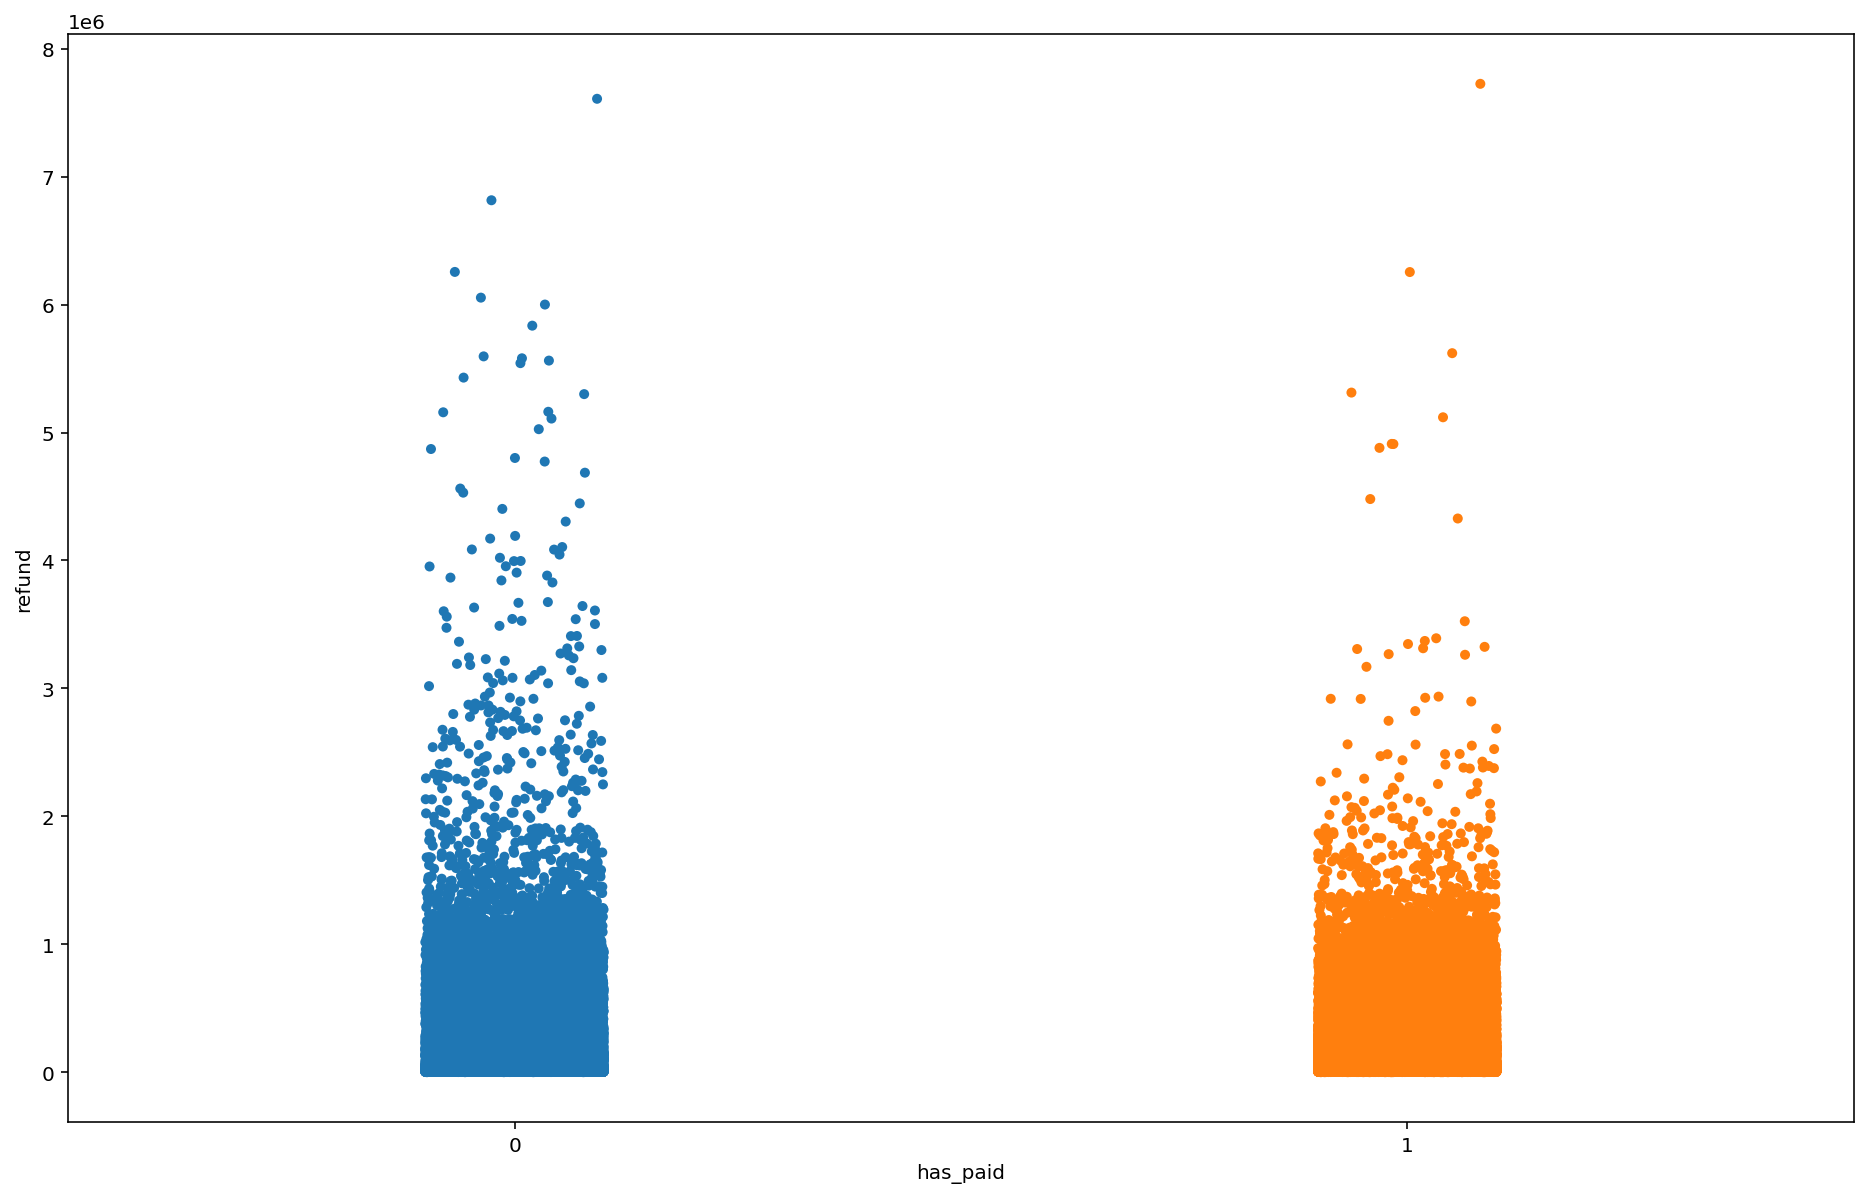

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


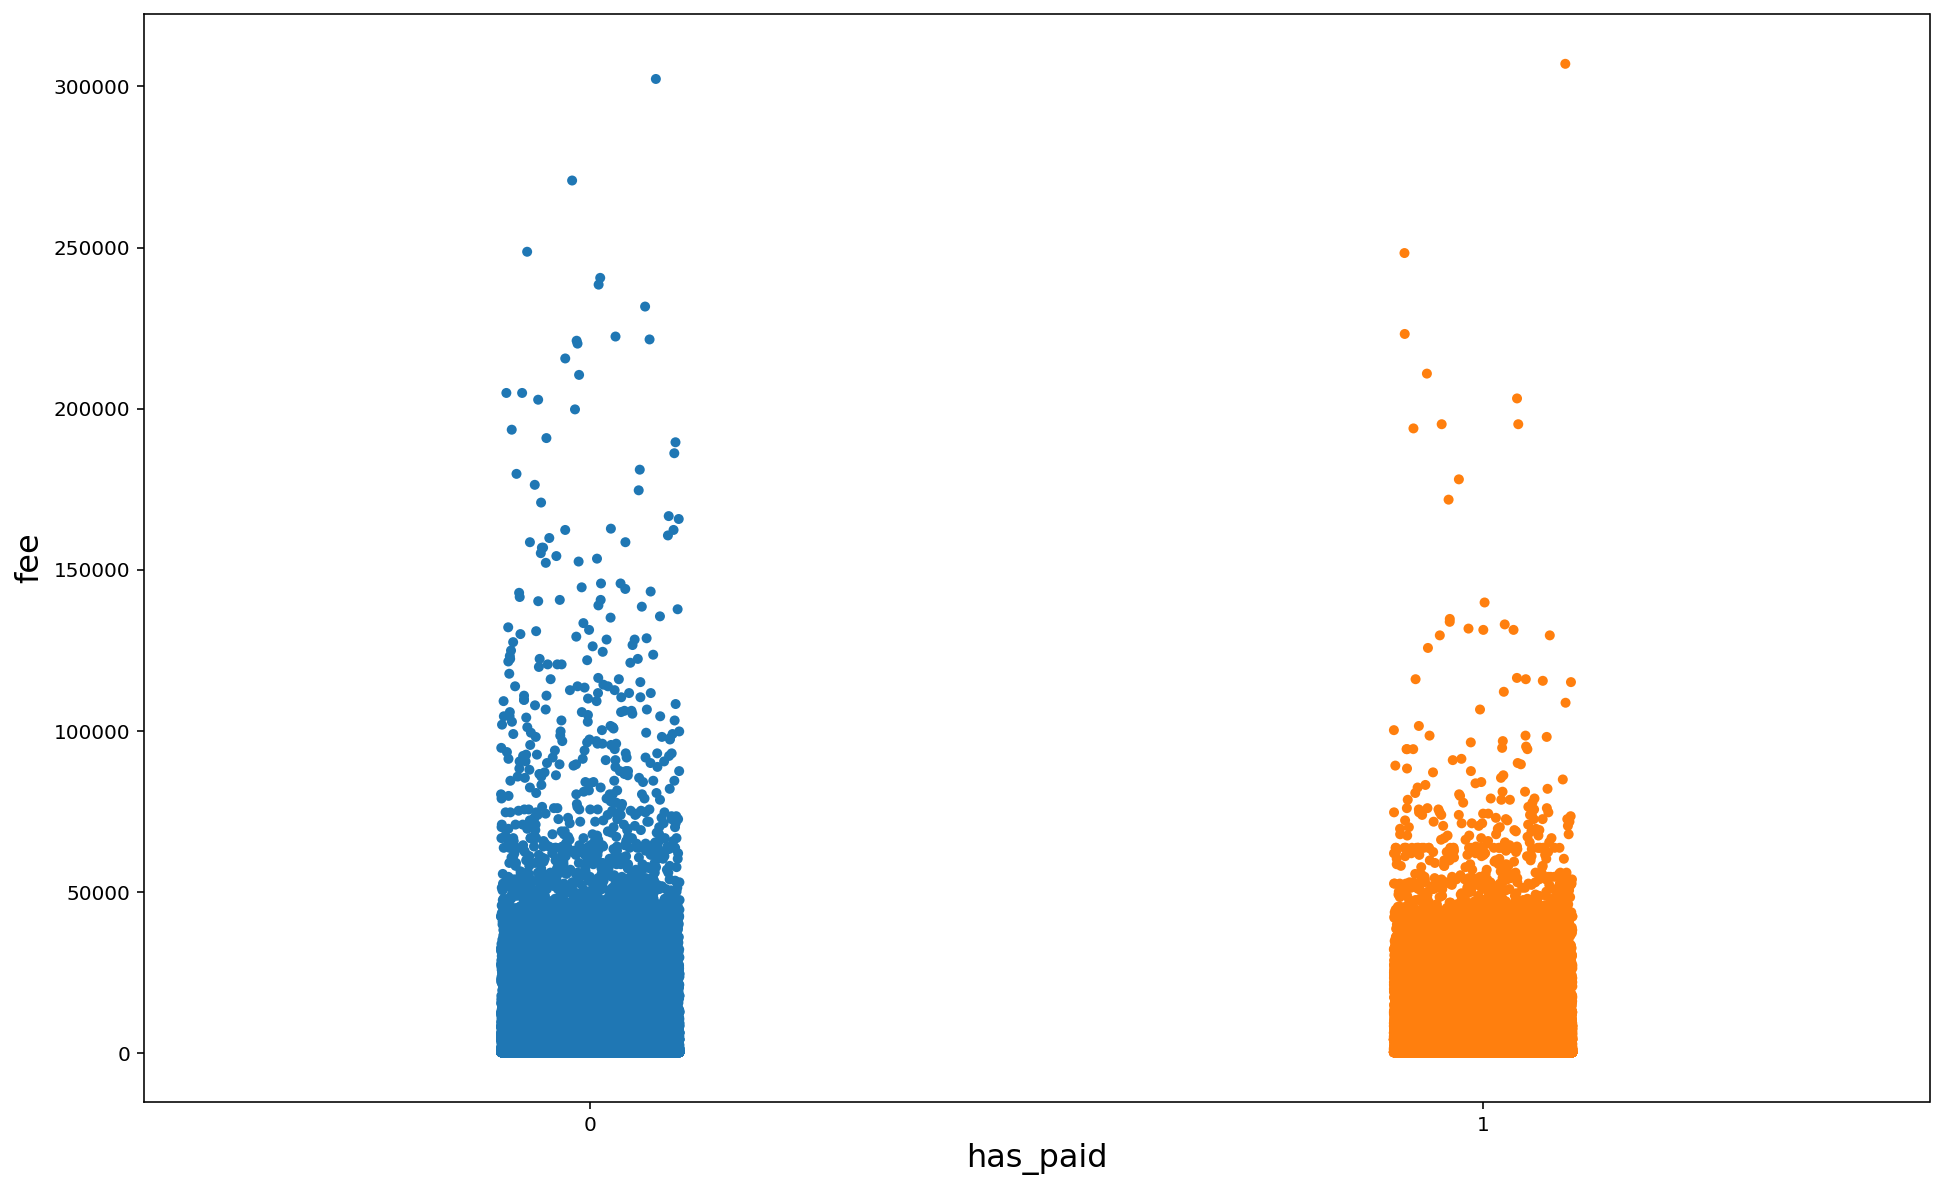

In [92]:
from matplotlib.gridspec import GridSpec
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(figsize=(16, 10))
sns.stripplot(y = df['refund'], x = df.has_paid)

fig, ax = plt.subplots(figsize=(16, 10))
sns.stripplot(y=df['fee'], x = df.has_paid)
plt.ylabel('fee', fontsize=16)
plt.xlabel("has_paid", fontsize=16)
fig.show()



plt.show()

In [93]:
df.corr().query('has_paid > 0.3 or has_paid < -0.3')

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율,income_cat,age_group,income,revenue,income_emp,income_bus,income_etc,fee_rat,fee_fix
has_paid,-0.023022,-0.026505,-0.136757,-0.094763,-0.117866,1.000000,0.048028,-0.015106,-0.044838,-0.078638,-0.31052,-0.024115,0.032346,0.358113,0.085290,0.139028,-0.020196,-0.052488,-0.097366
income_cat,0.008091,0.016084,-0.212674,0.017871,0.002310,-0.310520,-0.356215,-0.123660,-0.003490,0.009705,1.00000,0.008597,-0.381198,-0.082710,-0.522836,-0.188095,0.114646,-0.002609,0.018754
revenue,0.058279,-0.051622,0.034032,0.564786,0.563309,0.358113,-0.035513,0.469118,0.226930,0.086473,-0.08271,0.051565,0.185980,1.000000,-0.088534,0.137283,0.048539,0.482677,0.565697


In [94]:
df.describe()
## refund max 7.725000e+06
## refund min 1.000000e+03	
nopay_df.describe()## 수수료 중위값 4300, 최소값 400,
len(nopay_df[nopay_df['refund']==0])
# nopay_df[nopay_df['환급금_수수료율']<0]
print(len(nopay_df[nopay_df['refund']==0])/len(nopay_df) *100) ## 결제하지 않은 인원 중 환급금이 0원인 사람.
print(len(pay_df[pay_df['refund']==0])/len(pay_df) *100) ## 결제한 인원 중 환급금이 0원인 사람.

0.0
0.0


In [95]:
df.query('has_paid == 1 and fee==400') ## 수수료 최소인 400원 일 때 결제 건수 22303 
df.query('has_paid == 1') ## 총 결제 건수 64607
df.fee.max() # 307000.0
df.query('has_paid == 1 and fee == 8500.000000') # 3749 

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율,income_cat,age_group,income,revenue,income_emp,income_bus,income_etc,fee_rat,fee_fix
16,39.0,0,2015,232000.0,8500.0,1,0.0,1396000.0,0.0,3.66,1,2,1396000.0,8500.0,0.00,100.00,0.00,3.33,7725.6
55,47.0,1,2017,416000.0,8500.0,1,2087000.0,2507000.0,0.0,2.04,1,3,4594000.0,8500.0,45.43,54.57,0.00,4.00,16640.0
76,26.0,1,2019,239000.0,8500.0,1,5090000.0,1438000.0,0.0,3.56,0,1,6528000.0,8500.0,77.97,22.03,0.00,3.33,7958.7
89,33.0,1,2017,223000.0,8500.0,1,9749000.0,0.0,1441000.0,3.81,0,2,11190000.0,8500.0,87.12,0.00,12.88,3.33,7425.9
101,42.0,1,2018,106000.0,8500.0,1,11139000.0,1488000.0,0.0,8.02,0,3,12627000.0,8500.0,88.22,11.78,0.00,3.33,3529.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99869,32.0,0,2017,286000.0,8500.0,1,10464000.0,1722000.0,0.0,2.97,0,2,12186000.0,8500.0,85.87,14.13,0.00,4.00,11440.0
99875,29.0,0,2020,216000.0,8500.0,1,16597000.0,0.0,638000.0,3.94,0,1,17235000.0,8500.0,96.30,0.00,3.70,3.33,7192.8
99883,34.0,0,2019,226000.0,8500.0,1,12521000.0,1361000.0,0.0,3.76,0,2,13882000.0,8500.0,90.20,9.80,0.00,3.33,7525.8
99944,27.0,1,2019,233000.0,8500.0,1,0.0,1403000.0,181000.0,3.65,1,1,1584000.0,8500.0,0.00,88.57,11.43,3.33,7758.9


In [96]:
df.query('income_cat == 3 and has_paid == 1')

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율,income_cat,age_group,income,revenue,income_emp,income_bus,income_etc,fee_rat,fee_fix
1984,26.0,1,2019,4000.0,400.0,1,0.0,21000.0,21000.0,10.00,3,1,42000.0,400.0,0.0,50.0,50.0,2.00,80.0
3369,32.0,0,2018,7000.0,400.0,1,0.0,43000.0,43000.0,5.71,3,2,86000.0,400.0,0.0,50.0,50.0,2.00,140.0
3864,22.0,0,2018,98000.0,1700.0,1,0.0,77000.0,77000.0,1.73,3,1,154000.0,1700.0,0.0,50.0,50.0,2.00,1960.0
6073,48.0,0,2017,494000.0,12800.0,1,0.0,2976000.0,2976000.0,2.59,3,3,5952000.0,12800.0,0.0,50.0,50.0,4.00,19760.0
8428,25.0,0,2018,21000.0,400.0,1,0.0,128000.0,128000.0,1.90,3,1,256000.0,400.0,0.0,50.0,50.0,2.00,420.0
11636,22.0,0,2016,7000.0,400.0,1,0.0,43000.0,43000.0,5.71,3,1,86000.0,400.0,0.0,50.0,50.0,2.00,140.0
21438,21.0,0,2019,7000.0,400.0,1,0.0,43000.0,43000.0,5.71,3,1,86000.0,400.0,0.0,50.0,50.0,2.00,140.0
26501,43.0,1,2017,49000.0,900.0,1,0.0,128000.0,128000.0,1.84,3,3,256000.0,900.0,0.0,50.0,50.0,2.00,980.0
33642,29.0,1,2015,183000.0,4300.0,1,0.0,1105000.0,1105000.0,2.35,3,1,2210000.0,4300.0,0.0,50.0,50.0,3.33,6093.9
34327,28.0,0,2017,35000.0,400.0,1,0.0,213000.0,213000.0,1.14,3,1,426000.0,400.0,0.0,50.0,50.0,2.00,700.0


In [97]:
# !pip install pycaret

In [98]:
df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,환급금_수수료율,income_cat,age_group,income,revenue,income_emp,income_bus,income_etc,fee_rat,fee_fix
0,27.0,1,2019,5000.0,400.0,0,10001000.0,61000.0,0.0,8.00,0,1,10062000.0,0.0,99.39,0.61,0.00,2.00,100.0
1,34.0,0,2018,100000.0,1700.0,1,18092000.0,0.0,1815000.0,1.70,0,2,19907000.0,1700.0,90.88,0.00,9.12,3.33,3330.0
2,28.0,1,2017,289000.0,11500.0,0,0.0,1461000.0,0.0,3.98,1,1,1461000.0,0.0,0.00,100.00,0.00,4.00,11560.0
3,27.0,0,2019,410000.0,16200.0,0,0.0,2471000.0,0.0,3.95,1,1,2471000.0,0.0,0.00,100.00,0.00,4.00,16400.0
4,26.0,1,2016,114000.0,4300.0,1,0.0,689000.0,0.0,3.77,1,1,689000.0,4300.0,0.00,100.00,0.00,3.33,3796.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,27.0,1,2019,301000.0,11900.0,1,0.0,0.0,680000.0,3.95,2,1,680000.0,11900.0,0.00,0.00,100.00,4.00,12040.0
99996,62.0,1,2019,77000.0,1300.0,1,0.0,463000.0,0.0,1.69,1,5,463000.0,1300.0,0.00,100.00,0.00,2.00,1540.0
99997,24.0,0,2020,9000.0,400.0,0,7923000.0,54000.0,0.0,4.44,0,1,7977000.0,0.0,99.32,0.68,0.00,2.00,180.0
99998,24.0,0,2019,34000.0,400.0,1,0.0,204000.0,0.0,1.18,1,1,204000.0,400.0,0.00,100.00,0.00,2.00,680.0


In [280]:
xdf = df.copy()
xdf = xdf[['gender','year','age_group','refund','fee_fix', 'fee_rat','income_emp','income_bus','income_etc','has_paid', 'income_cat']]

In [103]:
!python --version

Python 3.8.3


In [104]:
!pip install pycaret

In [281]:
from pycaret.classification import *

clf = setup(data=xdf, target='has_paid',train_size=0.8, session_id=6, use_gpu=True)

,Description,Value
0,session_id,6
1,Target,has_paid
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(99870, 11)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


In [282]:
# best_3_models = compare_models(sort='MAE',n_select=3, fold=5)
best_3_models = compare_models(sort='F1',n_select=3, fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7290,0.7499,0.9087,0.7348,0.8125,0.3429,0.3692,6.2820
lightgbm,Light Gradient Boosting Machine,0.7291,0.7506,0.9018,0.7376,0.8114,0.3473,0.3704,0.8560
ada,Ada Boost Classifier,0.7231,0.7431,0.8959,0.7342,0.8070,0.3335,0.3551,1.8160
ridge,Ridge Classifier,0.7230,0.0000,0.8907,0.7361,0.8061,0.3365,0.3559,0.0660
lda,Linear Discriminant Analysis,0.7229,0.7277,0.8779,0.7412,0.8037,0.3439,0.3585,0.2620
lr,Logistic Regression,0.6961,0.6400,0.9608,0.6906,0.8035,0.2060,0.2722,0.2820
rf,Random Forest Classifier,0.6837,0.6904,0.8115,0.7295,0.7683,0.2744,0.2783,2.8780
nb,Naive Bayes,0.6404,0.6279,0.9070,0.6619,0.7653,0.0710,0.0905,0.0740
knn,K Neighbors Classifier,0.6644,0.6424,0.8057,0.7127,0.7563,0.2240,0.2284,2.1280
et,Extra Trees Classifier,0.6713,0.6658,0.7788,0.7305,0.7539,0.2609,0.2621,3.9180


In [283]:
tuned_top3 = [tune_model(i) for i in best_3_models]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7210,0.7410,0.8923,0.7336,0.8052,0.3298,0.3502
1,0.7268,0.7406,0.9024,0.7351,0.8102,0.3403,0.3640
2,0.7188,0.7433,0.8978,0.7295,0.8049,0.3200,0.3431
3,0.7208,0.7377,0.8962,0.7319,0.8058,0.3268,0.3488
4,0.7247,0.7490,0.8991,0.7344,0.8085,0.3362,0.3588
5,0.7262,0.7467,0.8974,0.7365,0.8090,0.3415,0.3631
6,0.7235,0.7454,0.8948,0.7350,0.8071,0.3353,0.3563
7,0.7254,0.7435,0.9036,0.7334,0.8096,0.3354,0.3600
8,0.7235,0.7483,0.9009,0.7327,0.8081,0.3317,0.3553
9,0.7170,0.7426,0.8873,0.7318,0.8021,0.3212,0.3402


In [284]:
blender_top3 = blend_models(estimator_list=tuned_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7257,0.7461,0.9024,0.7341,0.8096,0.3371,0.3610
1,0.7304,0.7495,0.9080,0.7363,0.8132,0.3474,0.3731
2,0.7268,0.7516,0.9127,0.7313,0.8120,0.3341,0.3629
3,0.7249,0.7476,0.9057,0.7322,0.8097,0.3329,0.3585
4,0.7352,0.7565,0.9156,0.7378,0.8171,0.3566,0.3852
5,0.7353,0.7543,0.9074,0.7411,0.8159,0.3618,0.3861
6,0.7286,0.7531,0.9123,0.7331,0.8129,0.3396,0.3678
7,0.7301,0.7505,0.9101,0.7353,0.8134,0.3452,0.3720
8,0.7284,0.7556,0.9076,0.7346,0.8120,0.3416,0.3676
9,0.7272,0.7522,0.9094,0.7329,0.8117,0.3373,0.3644


In [241]:
len(xdf)*0.2

19974.0

In [285]:
final_model = finalize_model(blender_top3)
prediction = predict_model(final_model, data=xdf.iloc[round(len(xdf)*0.2):])
### test_set length 길이만큼 예측 후 나중에 test 셋과 비교

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 

In [286]:
prediction

,gender,year,age_group,refund,fee_fix,fee_rat,income_emp,income_bus,income_etc,has_paid,income_cat,Label,Score
19998,0,2017,1,77000.0,3033.8,3.94,0.00,95.65,4.35,1,1,1,0.7164
19999,0,2016,1,9000.0,354.6,3.94,0.00,100.00,0.00,1,1,1,0.6109
20000,0,2017,2,133000.0,4428.9,3.33,0.00,100.00,0.00,1,1,1,0.6936
20001,1,2020,2,49000.0,1930.6,3.94,99.04,0.00,0.96,0,0,1,0.5674
20002,0,2019,1,52000.0,2048.8,3.94,0.00,0.00,0.00,0,6,0,0.6751
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,2019,1,301000.0,6321.0,2.10,0.00,0.00,100.00,1,2,1,0.5386
99996,1,2019,5,77000.0,3033.8,3.94,0.00,100.00,0.00,1,1,1,0.7316
99997,0,2020,1,9000.0,354.6,3.94,99.32,0.68,0.00,0,0,0,0.5545
99998,0,2019,1,34000.0,1339.6,3.94,0.00,100.00,0.00,1,1,1,0.7173


In [288]:
# evaluate_model(final_model)
evaluate_model(tuned_top3[0])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [289]:
pred_list = prediction[prediction['has_paid']==1].index.tolist()
hd_list = df[df['has_paid']==1].index.tolist()

In [290]:
pred_list == hd_list

False

In [291]:
count = 0
for i in pred_list:
    if i in hd_list:
        count += 1
print(count)

51554


In [292]:
(prediction['fee_fix'] * prediction['has_paid']).sum()

249477694.8

In [293]:
len(prediction[prediction['has_paid'] ==1])/len(prediction)

0.6452638429958947

In [294]:
len(prediction[prediction['Label'] ==1])/len(prediction)

0.796973565635326

In [295]:
len(df[df['has_paid']==1])/len(df)

0.6465405026534495

In [296]:
(df['fee'] * df['has_paid']).sum()

400633700.0

In [298]:
prediction.to_csv('C:/Users/Bonghwan/Downloads/jobis/prediction4(fee_fix&fee_rat).csv')

In [260]:
from pycaret.utils import check_metric
check_metric(prediction['has_paid'], prediction['Label'], metric = 'Accuracy')

0.7326

In [299]:
pred1 = pd.read_csv('C:/Users/Bonghwan/Downloads/jobis/prediction.csv')
pred2 = pd.read_csv('C:/Users/Bonghwan/Downloads/jobis/prediction2(fee).csv')
pred3 = pd.read_csv('C:/Users/Bonghwan/Downloads/jobis/prediction3(fee&income_percent).csv')
pred4 = pd.read_csv('C:/Users/Bonghwan/Downloads/jobis/prediction4(fee_fix&fee_rat).csv')


In [208]:
check_metric(pred1['has_paid'], pred1['Label'], metric = 'Accuracy')

0.7349

In [209]:
check_metric(pred2['has_paid'], pred2['Label'], metric = 'Accuracy')

0.7371

In [210]:
check_metric(pred3['has_paid'], pred3['Label'], metric = 'Accuracy')

0.7375

In [262]:
check_metric(pred4['has_paid'], pred4['Label'], metric = 'Accuracy')

0.7326

In [303]:
# print((pred1['Label'] * pred1['fee_fix']).sum())
# print((pred2['Label'] * pred2['fee']).sum())
# print((pred3['Label'] * pred3['fee']).sum())
# print((pred4['Label'] * pred4['fee_fix']).sum())

print('1. 수수료 상향 조정, 2. 수수료 변화 X, 3. 수수료 변화 X and 소득 %로 변환, 4. 수수료 하향 조정')
print('예측 수수료 합 \n 1. {} \n 2. {} \n 3. {} \n 4. {} \n 5. {} - 실제 수수료 합 '.format((pred1['Label'] * pred1['fee_fix']).sum(), (pred2['Label'] * pred2['fee']).sum(), (pred3['Label'] * pred3['fee']).sum(), (pred4['Label'] * pred4['fee_fix']).sum(), (pred2['has_paid'] * pred2['fee']).sum()))
print('예측 결제 건수 1. {} \t 2. {} \t 3. {} \t 4. {} '.format(pred1['Label'].sum(), pred2['Label'].sum(), pred3['Label'].sum(), pred4['Label'].sum()))
# print(pred1['Label'].sum())
# print(pred2['Label'].sum())
# print(pred3['Label'].sum())
# print(pred4['Label'].sum())

## 실제 예측 값 확인
print(pred1['has_paid'].sum())
print(pred2['has_paid'].sum())
## 실제 수수료 합
print((pred2['has_paid'] * pred2['fee']).sum())

1. 수수료 상향 조정, 2. 수수료 변화 X, 3. 수수료 변화 X and 소득 %로 변환, 4. 수수료 하향 조정
예측 수수료 합 
 1. 403730643.4 
 2. 341739100.0 
 3. 341242600.0 
 4. 281155265.6 
 5. 320682700.0 - 실제 수수료 합 
예측 결제 건수 1. 65310 	 2. 62470 	 3. 62622 	 4. 63675 
51554
51554
320682700.0


In [217]:
pred2['Label'] * pred2['fee']

0         2100.0
1          400.0
2         3800.0
3          900.0
4            0.0
          ...   
79891    11900.0
79892     1300.0
79893        0.0
79894      400.0
79895      400.0
Length: 79896, dtype: float64

In [218]:
pred3['Label'] * pred3['fee']

0         2100.0
1          400.0
2         3800.0
3          900.0
4            0.0
          ...   
79891    11900.0
79892     1300.0
79893        0.0
79894      400.0
79895      400.0
Length: 79896, dtype: float64

### 결제 여부에 영향일 미치는 요인?

1. 환급액이 많을 수록 결제를 많이 할까? - X  
- 환급액은 결제율에 큰 영향을 미치지 않음.

2. 수수료가 비싸지면 결제를 안할까?   
- 수수료 75% 이상중 결제율 - 59.4064%  
- 수수료 50% 이상중 결제율 - 62.8733%  
- 수수료 25% 이상중 결제율 - 64.6559%   
- 전체 데이터 중에서 결제율 - 64.6559%  

3. 수수료율이 높아지면 결제를 안할까?  
수수료율 75% 3.94  
- 수수료율 75% 이상중 결제율 - 55.1890%
- 수수료율 50% 이상중 결제율 - 57.4656% 
- 수수료율 25% 이상중 결제율 - 62.47276%
- 전체 데이터 중에서 결제율 - 64.6559%

### 수수료 총 합계를 늘릴 수 있는 방법?

#### 1. 수수료율 상향 조정 - 수수료율 상향 조정으로 더 큰 수수료 수입을 유도
#### 2. 수수료율 하향 조정 - 수수료율 하향 조정으로 더 많은 결제를 유도


#####  현재 결과들간 정확도의 유의미한 차이는 없는 걸로 보임

1. 수수료 상향 조정, 2. 수수료 변화 X, 3. 수수료 변화 X and 소득 %로 변환, 4. 수수료 하향 조정 and income_cat 설정
예측 수수료 합 
 1. 403730643.4 
 2. 341739100.0 
 3. 341242600.0 
 4. 279842999.6 
 5. 320682700.0 - 실제 수수료 합 

예측 결제 건수 1. 65310 	 2. 62470 	 3. 62622 	 4. 63426 

#### 예측 결과를 통해 수수료율을 낮추는 경우( 환급액의 액수가 클 때)와 비교하여, 크게 늘어나지 않고, 오히려 줄어드는 경우도 있는 걸로 보아 수수료율의 영향은 크지 않은 것으로 생각됨. 
##### *추가적으로 생각해볼 점은 정확도(accuracy)가 낮은 편이기에 신뢰도가 높지 않은 편.*


- 결제량 향상 타겟 :
연령대 20~30 대

- 타겟 집중 마케팅
이용 프로세스 개선
현재 수수료 선 결제 -> 환급 신청 -> 환급 순으로 이루어짐. => 프로세스 개선 불가능

"삼쩜삼에서는 종합소득세 신고를 담당하고, 환급은 고객님의 관할 세무서(국세)와 시,군,구청(지방세)에서 담당하기 때문에 환급금에서 수수료를 차감할 수 없습니다."

- 어플 출시...?
2020년부터 홈택스의 어플인 손택스에서 미수령 환급금을 받을 수 있는 서비스를 제공 => 간단하게 이름과 주민등록번호만 입력 후 조회가능
동일하게 최근 5년간의 미수령 환급액 조회 가능 하지만 삼쩜삼의 경우 따로 어플은 없고, 사이트를 통해 신청해야함.

---  추가
환급액이 마이너스(-) 인데도 결제 => 환급금이 마이너스 인 경우 혹은 환급을 받지 못하는 경우 수수료를 받지 않는 정책
